In [1]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm


In [2]:
#| echo: false
from IPython.display import display
pd.options.display.notebook_repr_html = False

In [35]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

## MovieLens 1M Dataset
Source: [MovieLens 1M movie ratings](https://grouplens.org/datasets/movielens/1m/)  
McKinney’s: 13. Data Analysis Examples

1990년대 후반에서 2000년대 초반의 영화 평가에 대한 3개의 relational data로 이루어져 있고,  
`user_id`, `movie_id`의 keys로 연결되어 있습니다.

- `users`: 유저에 대한 정보
- `ratings`: 평점에 대한 정보
- `movies`: 영화에 대한 정보

![](images/movielens.png){width=650}

In [36]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)
users

      user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
...       ...    ...  ...         ...    ...
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]

In [37]:
#| echo: false
#| output: false
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "../data/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
...          ...       ...     ...        ...
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [ ]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

In [38]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies.head(6)

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller

___

1. `ratings`과 `users` 데이터를 merge한 후 `user_rating` 데이터셋을 만드세요.

In [39]:
user_rating = pd.merge(users, ratings)
user_rating

         user_id gender  age  occupation    zip  movie_id  rating  timestamp
0              1      F    1          10  48067      1193       5  978300760
1              1      F    1          10  48067       661       3  978302109
2              1      F    1          10  48067       914       3  978301968
...          ...    ...  ...         ...    ...       ...     ...        ...
1000206     6040      M   25           6  11106       562       5  956704746
1000207     6040      M   25           6  11106      1096       4  956715648
1000208     6040      M   25           6  11106      1097       4  956715569

[1000209 rows x 8 columns]

2. 다음과 같이 영화(`movie_id`)별로 남녀(`gender`)에 따른 `rating`의 평균과 그 개수(`count`)을 구해보세요.

In [40]:
mean_ratings = (
    user_rating
    .groupby(["movie_id", "gender"])["rating"]
    .agg(["mean", "count"])
    .reset_index()
)
mean_ratings.head(6)

   movie_id gender  mean  count
0         1      F  4.19    591
1         1      M  4.13   1486
2         2      F  3.28    176
3         2      M  3.18    525
4         3      F  3.07    136
5         3      M  2.99    342

3. 다음과 같이 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요.
   평가의 수가 많은 영화일수록 평가가 높아지는 현상에 대해 설명할 수 있을까요?
   또한, 남녀의 평가에 차이가 벌어지는 현상을 설명할 수 있을까요?

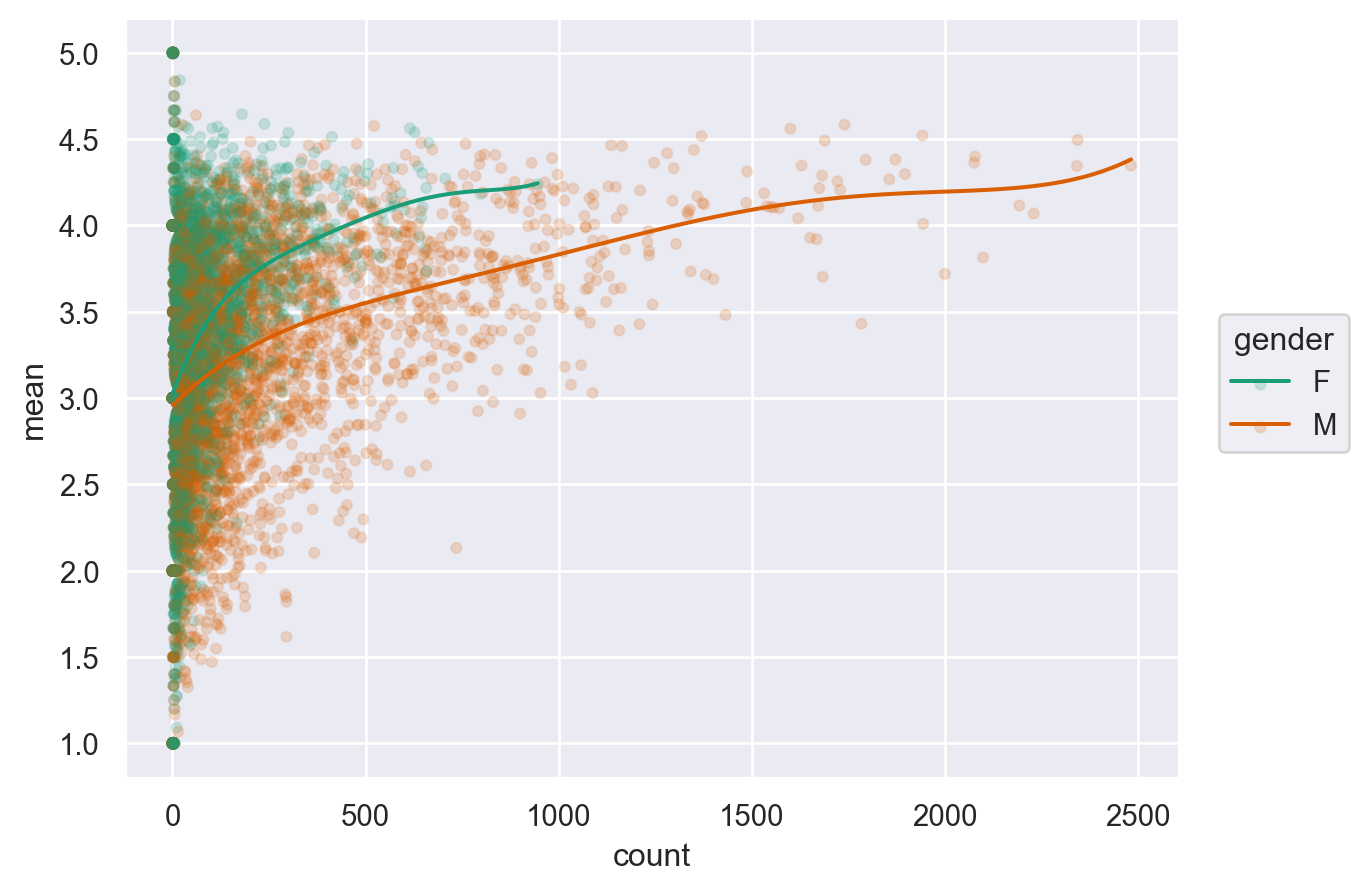

In [9]:
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
)

4. 3번에서 `seaborn.objects`에 `.limit(x=(0, 500), y=(2.5, 4.5))`을 추가하여 평가 개수(`count`)가 0에서 500사이이고, 평균 `rating`이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

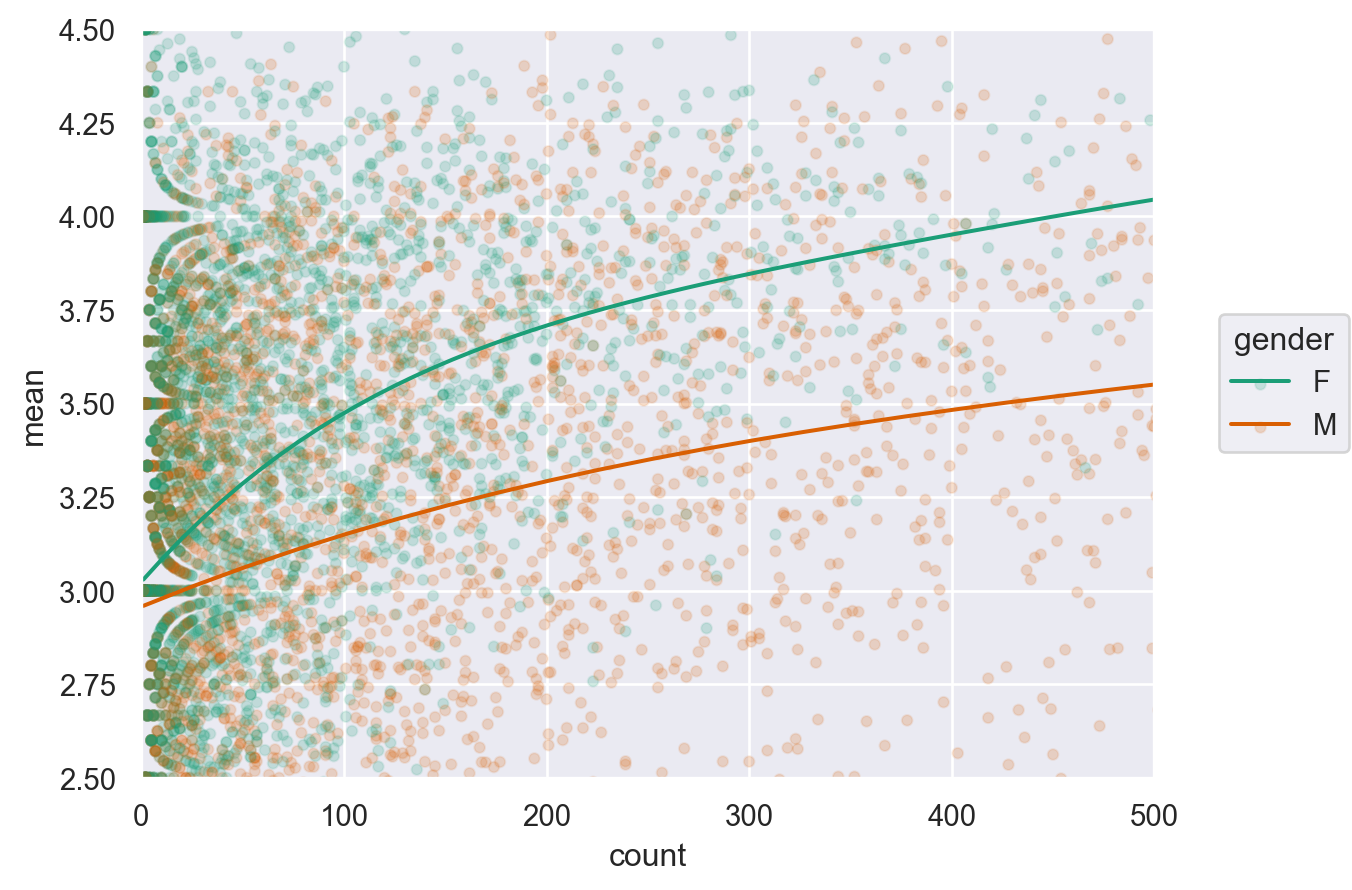

In [10]:
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
    .limit(x=(0, 500), y=(2.5, 4.5))
)

5. 영화별로 남녀의 평가가 크게 갈리는 영화들을 찾기 위해
   
   - 5.1 2번에서 구한 데이터에서 **남녀 모두** rating이 300개 이상 있는 영화로만 간추려보세요.  
   - 5.2 이 데이터를 `popular_movies`라고 명명하고,  
     - 이 데이터를 `gender`에 관해 wide format으로 변환한 후; `pivot()`을 이용  
      - 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; `assign()`을 이용
      - 그 차이로 sort한 후,
   - 5.3 여자의 선호가 더 높은 영화 5편과 남자의 선호가 더 높은 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.  
     - 이를 위해서 `movies` 테이블 안의 영화제목(`title`)을 `merge()`를 이용해 추가하세요.

5.1 2번에서 구한 데이터에서 **남녀 모두** rating이 300개 이상 있는 영화로만 간추려보세요.

In [47]:
def size_mf(g):
    if g["gender"].size == 2:
        return g

popular_movies = (
    mean_ratings
    .query('count >= 300')
    .groupby("movie_id", group_keys=False)
    .apply(size_mf)
)
popular_movies.head(6)

    movie_id gender  mean  count
0          1      F  4.19    591
1          1      M  4.13   1486
20        11      F  3.92    379
21        11      M  3.72    654
32        17      F  4.23    420
33        17      M  3.82    415

In [49]:
# 또는 .filter()를 이용
popular_movies = (
    mean_ratings
    .query('count >= 300')
    .groupby("movie_id")
    .filter(lambda x: x.shape[0] == 2)
)
popular_movies.head(6)

    movie_id gender  mean  count
0          1      F  4.19    591
1          1      M  4.13   1486
20        11      F  3.92    379
21        11      M  3.72    654
32        17      F  4.23    420
33        17      M  3.82    415

5.2 이 데이터를 `popular_movies`라고 명명하고,  
    이 데이터를 `gender`에 관해 wide format으로 변환한 후; `pivot()`을 이용  
    여자의 평균 rating에서 남자의 평균 rating의 차이를 구해 데이터에 추가한 후; `assign()`을 이용

In [42]:
diffs_fm = (
    popular_movies
    .pivot(index="movie_id", columns="gender", values="mean")
    .assign(diffs = lambda x: x.F - x.M)
    .sort_values("diffs")
)
diffs_fm

gender      F    M  diffs
movie_id                 
2791     3.66 4.06  -0.41
1221     4.04 4.44  -0.40
589      3.79 4.12  -0.33
...       ...  ...    ...
920      4.27 3.83   0.44
1028     4.20 3.73   0.47
2657     3.67 3.16   0.51

[131 rows x 3 columns]

 5.3 여자의 선호가 더 큰 영화 5편과 남자의 선호가 더 큰 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.
     이를 위해서 `movies` 테이블에서 영화제목을 `merge()`를 이용해 구하세요.

In [43]:
diffs_fm = diffs_fm.merge(movies[["movie_id", "title"]], left_index=True, right_on="movie_id") # diffs_fm의 movie_id가 index!

In [44]:
diffs_fm.head(5)

        F    M  diffs  movie_id                              title
2722 3.66 4.06  -0.41      2791                   Airplane! (1980)
1203 4.04 4.44  -0.40      1221     Godfather: Part II, The (1974)
585  3.79 4.12  -0.33       589  Terminator 2: Judgment Day (1991)
1196 3.89 4.22  -0.33      1214                       Alien (1979)
1220 3.90 4.21  -0.31      1240             Terminator, The (1984)

In [16]:
diffs_fm.tail(5)

        F    M  diffs  movie_id                                  title
1171 4.17 3.77   0.41      1188               Strictly Ballroom (1992)
16   4.23 3.82   0.41        17           Sense and Sensibility (1995)
908  4.27 3.83   0.44       920              Gone with the Wind (1939)
1015 4.20 3.73   0.47      1028                    Mary Poppins (1964)
2588 3.67 3.16   0.51      2657  Rocky Horror Picture Show, The (1975)

6. 3번에서 플랏에서 유추되듯이 평가의 개수가 영화의 완성도 혹은 인기도를 파악할 수 있는 대략적인 지표가 될 수 있습니다. 즉, 평가수가 많을 수록 평점도 높습니다. 따라서 평가 개수를 바탕으로 인기도(`popularity`)를 수치화 하려고 합니다.
   - 6.1 우선, 3번 플랏에서 평가수가 같다면 여성이 더 높은 평점을 주는 것으로 보이는데, 이 현상을 다음과 같이 자세히 들여다 봅니다.
     - 다음 함수를 **성별로 grouping**된 `user_rating` 데이터에 `apply()` 하세요.
  
        ```python
        def popular(g):
            g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
            return g
        ```
    - 이 함수의 의미를 파악하고, 20단계 (0, 1, 2, ..., 19)의 popularity가 성별을 고려하여 각 영화에 부여되었음을 이해합니다.
    - 이제, 다음과 같이 `popularity`에 따라 평점이 높아지는 현상을 성별을 고려한 후 본 결과를 플랏을 통해 확인해봅니다. 

In [45]:
def popular(g):
    g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
    return g

popularity = mean_ratings.groupby("gender", group_keys=False).apply(popular)
popularity

      movie_id gender  mean  count  popularity
0            1      F  4.19    591          19
1            1      M  4.13   1486          19
2            2      F  3.28    176          17
...        ...    ...   ...    ...         ...
7149      3951      M  4.04     23           4
7150      3952      F  3.76    105          15
7151      3952      M  3.79    283          15

[7152 rows x 5 columns]

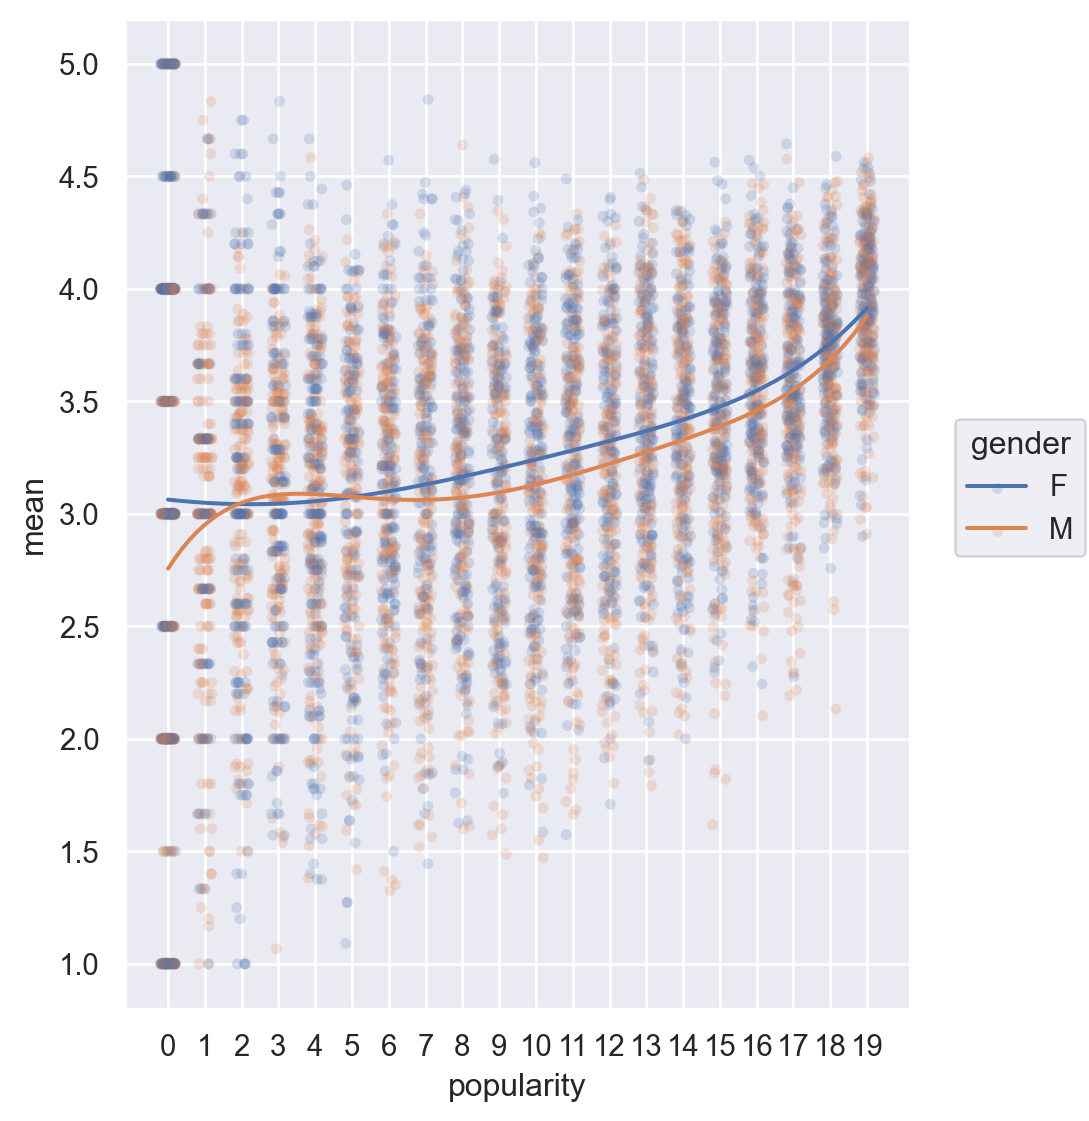

In [18]:
(
    so.Plot(popularity, x="popularity", y="mean", color="gender")
    .add(so.Dots(alpha=0.01), so.Jitter(width=.5))
    .add(so.Line(), so.PolyFit(5))
    .scale(x=so.Continuous().tick(at=np.arange(20)))
    .layout(size=(5, 6))
)

7. 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.
   
   - 5번에서 구한 `popular_movies`에 한해 남녀별 평점의 편차를 표준편차로 구해보고,
   - 남녀별로 편차 상위 2개만 표시합니다. (동등한 순서 모두)
   - 영화제목을 `movies` 데이터와 merge하여 표시합니다.

In [50]:
popular_movies

      movie_id gender  mean  count
0            1      F  4.19    591
1            1      M  4.13   1486
20          11      F  3.92    379
...        ...    ...   ...    ...
6452      3578      M  4.11   1539
6773      3751      F  3.89    367
6774      3751      M  3.88    962

[262 rows x 4 columns]

In [20]:
ratings_std = (
    user_rating
    .groupby(["gender", "movie_id"])["rating"]
    .std()
    .reset_index(name="std")
)
ratings_std

     gender  movie_id  std
0         F         1 0.87
1         F         2 1.02
2         F         3 1.08
...     ...       ...  ...
7149      M      3950 1.12
7150      M      3951 1.07
7151      M      3952 0.90

[7152 rows x 3 columns]

In [21]:
pd.options.display.max_rows = 0

def top(g, n=3):
    return g.nlargest(n, "std", keep="all")

ratings_top = ratings_std.groupby(["gender"]).apply(top, n=2)
ratings_top

            gender  movie_id  std
gender                           
F      533       F       559 2.83
       1605      F      1899 2.83
       2156      F      2483 2.83
       2182      F      2512 2.83
       2654      F      3021 2.83
       3400      F      3866 2.83
M      4034      M       572 2.83
       6465      M      3232 2.31
       7004      M      3800 2.31

In [22]:
ratings_top.merge(movies).drop(columns="movie_id")

  gender  std                                              title   
0      F 2.83                               Paris, France (1993)  \
1      F 2.83                       Passion in the Desert (1998)   
2      F 2.83  Day of the Beast, The (El Día de la bestia) (1...   
3      F 2.83  Ballad of Narayama, The (Narayama Bushiko) (1982)   
4      F 2.83                               Funhouse, The (1981)   
5      F 2.83                                Sunset Strip (2000)   
6      M 2.83                             Foreign Student (1994)   
7      M 2.31                               Seven Chances (1925)   
8      M 2.31      Criminal Lovers (Les Amants Criminels) (1999)   

                   genres  
0                  Comedy  
1         Adventure|Drama  
2  Comedy|Horror|Thriller  
3                   Drama  
4                  Horror  
5                  Comedy  
6                   Drama  
7                  Comedy  
8           Drama|Romance  

8. 이제 초점을 유저들에게 돌려, 유저들의 특성을 고려해봅니다. 일반적으로 같은 소스(사람)에서 온 데이터는 비슷한 성향을 띄는데 이를 **depenency**의 문제라고 합니다. 한 가족 구성원으로부터 왔다든데 같은 학교의 학생들과 같이 구체적으로 명시하기 어렵지만 데이터 상에서 비슷한 군집을 이룹니다. 이 데이터의 경우 동일은 유저들의 특성이 존재할 수 있는데 예를 들어 후한 점수를 준다든가 같은 유저라도 어떤 장르의 영화는 매우 낮은 평점을 준다든가 하는 현상이 있을 수 있는데 이를 알아봅니다.
   - 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.
   - 8.2 개인별로 평점의 평균과 표준편차를 구합니다.

8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.

In [23]:
pd.options.display.max_rows=0
rate_n = user_rating.groupby(["user_id", "gender"]).size().reset_index(name="n")
rate_n.describe()


       user_id       n
count  6040.00 6040.00
mean   3020.50  165.60
std    1743.74  192.75
min       1.00   20.00
25%    1510.75   44.00
50%    3020.50   96.00
75%    4530.25  208.00
max    6040.00 2314.00

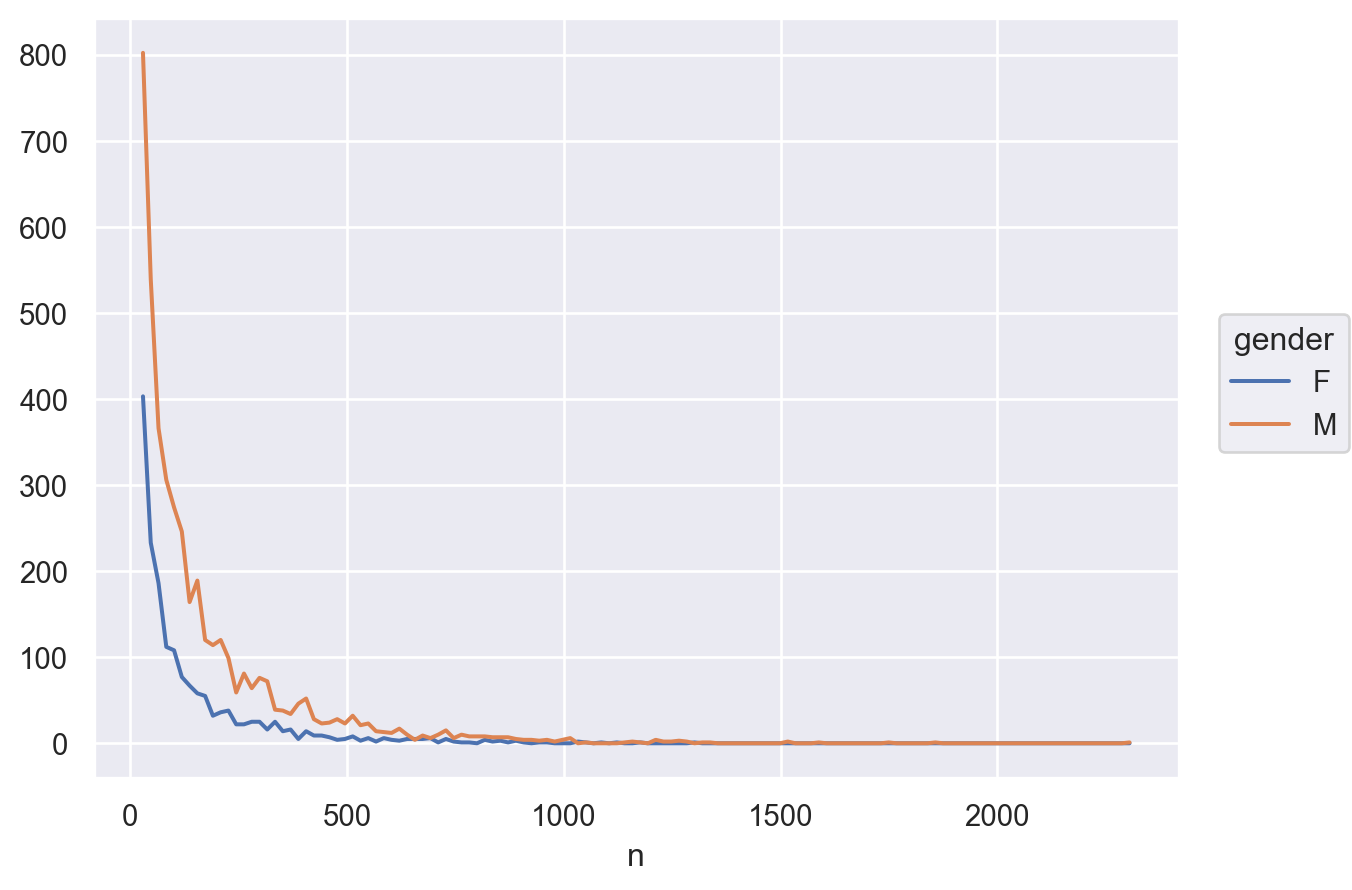

In [24]:
p = (
    so.Plot(rate_n, x="n", color="gender")
    .add(so.Line(), so.Hist())
)
p

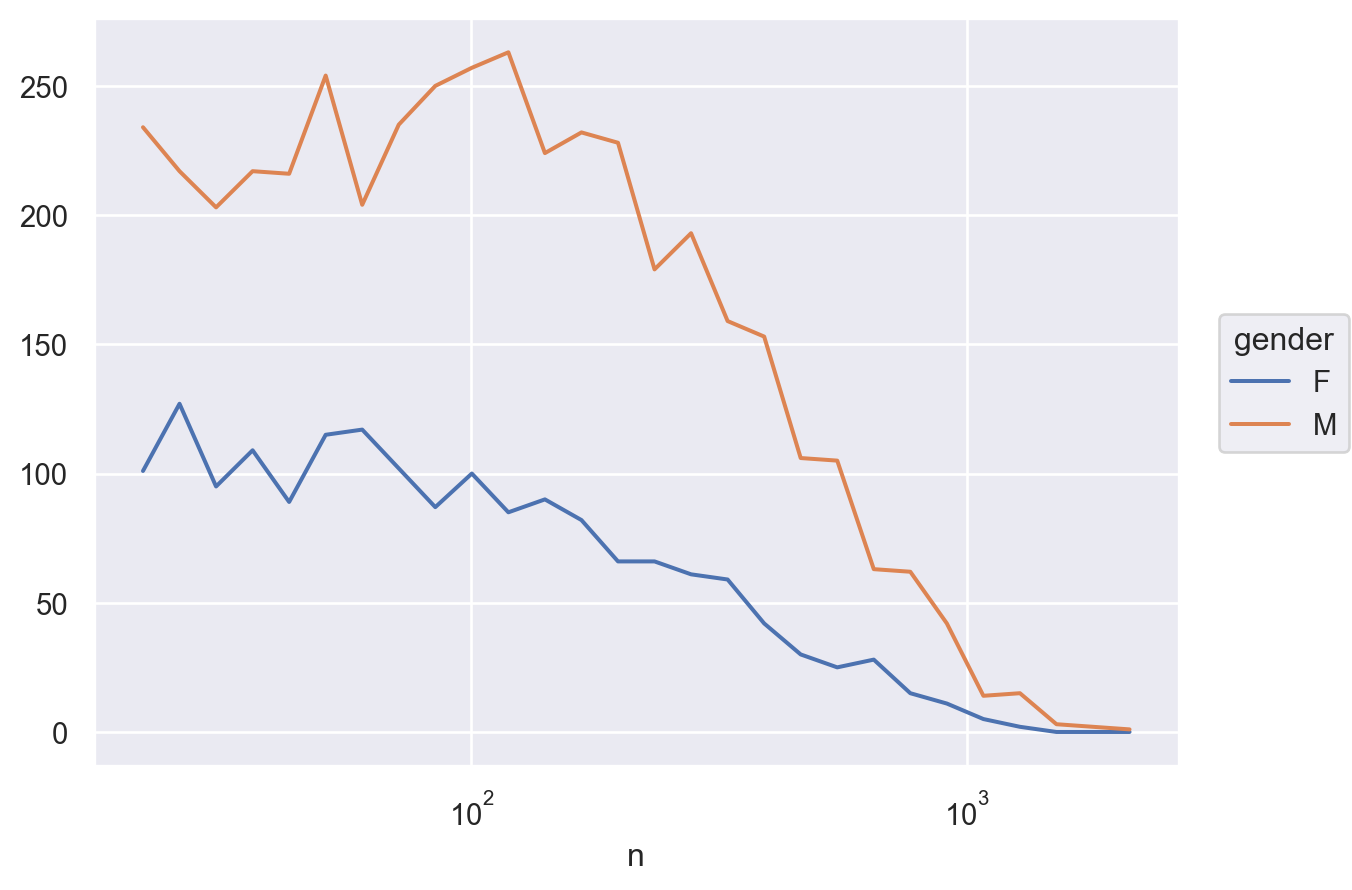

In [25]:
p.scale(x="log")

8.2 유저 개인별로 평점(`rating`)의 평균과 표준편차, 개수를 구합니다.

In [26]:
pd.options.display.max_rows = 7

user_stats = (
    user_rating
    .groupby("user_id")["rating"]
    .agg(["mean", "std", "count"])
)
user_stats

         mean  std  count
user_id                  
1        4.19 0.68     53
2        3.71 1.00    129
3        3.90 0.98     51
...       ...  ...    ...
6038     3.80 1.11     20
6039     3.88 0.73    123
6040     3.58 1.18    341

[6040 rows x 3 columns]

8.3 이 세 변수의 관계를 보기 위해, 평점 개수를 10개의 구간으로 `pd.cut`을 이용해 discretize해서 살펴봅니다.
    - 8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다.
    - 즉, 다수는 2백개 이하의 평점을 남긴 반면, 소수의 유저들 중에는 수천개의 평점을 남긴 사람도 있습니다.
    - 10개 구간으로 discretized된 (log) `count`를 `.facet`을 이용해 다음과 같이 유저들 각자의 평점 평균과 표준편차의 관계를 살펴봅니다.
    - 이 현상을 설명할 수 있을까요?
    - 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측할 수 있을까요?

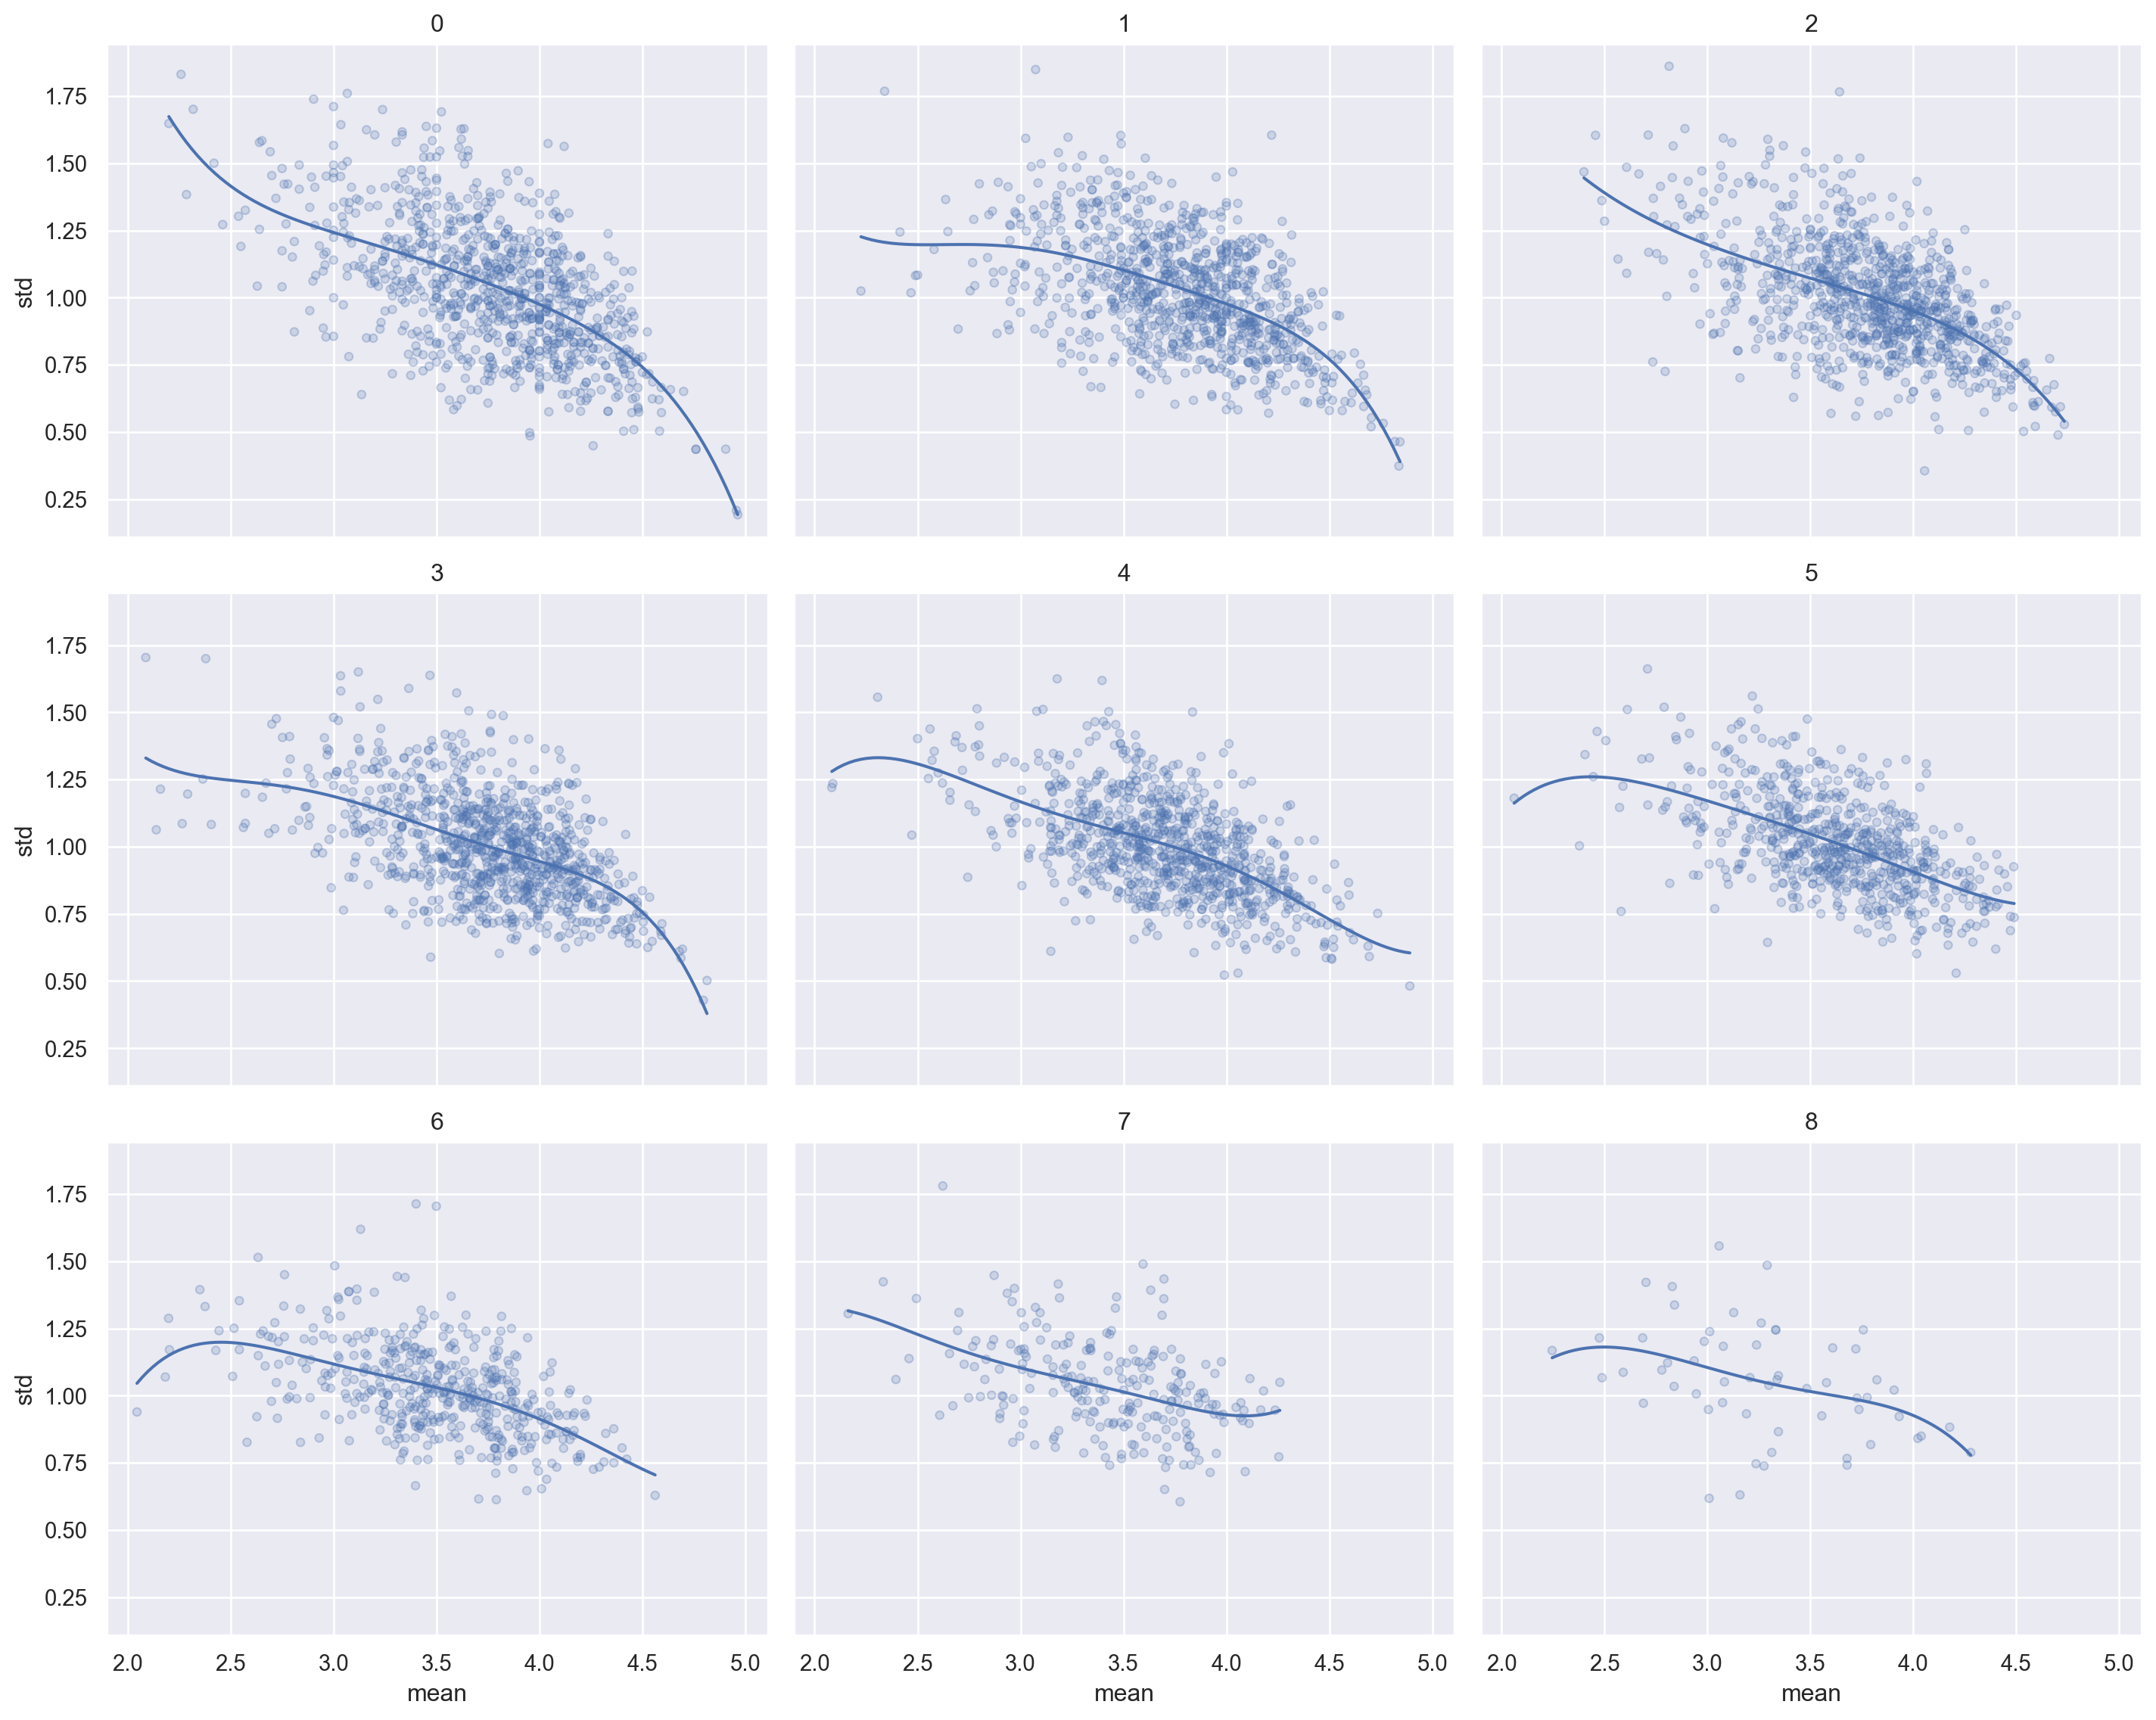

In [27]:
user_stats["lcount"] = np.log(user_stats["count"])
user_stats["lcount_cat"] = pd.cut(user_stats["lcount"], 10, labels=False)
(
    so.Plot(user_stats.query('mean > 2 & lcount_cat < 9'), x="mean", y="std")
    .add(so.Dots(alpha=.3))
    .add(so.Line(), so.PolyFit(5))
    .facet("lcount_cat", wrap=3)
    .layout(size=(15, 12))
)

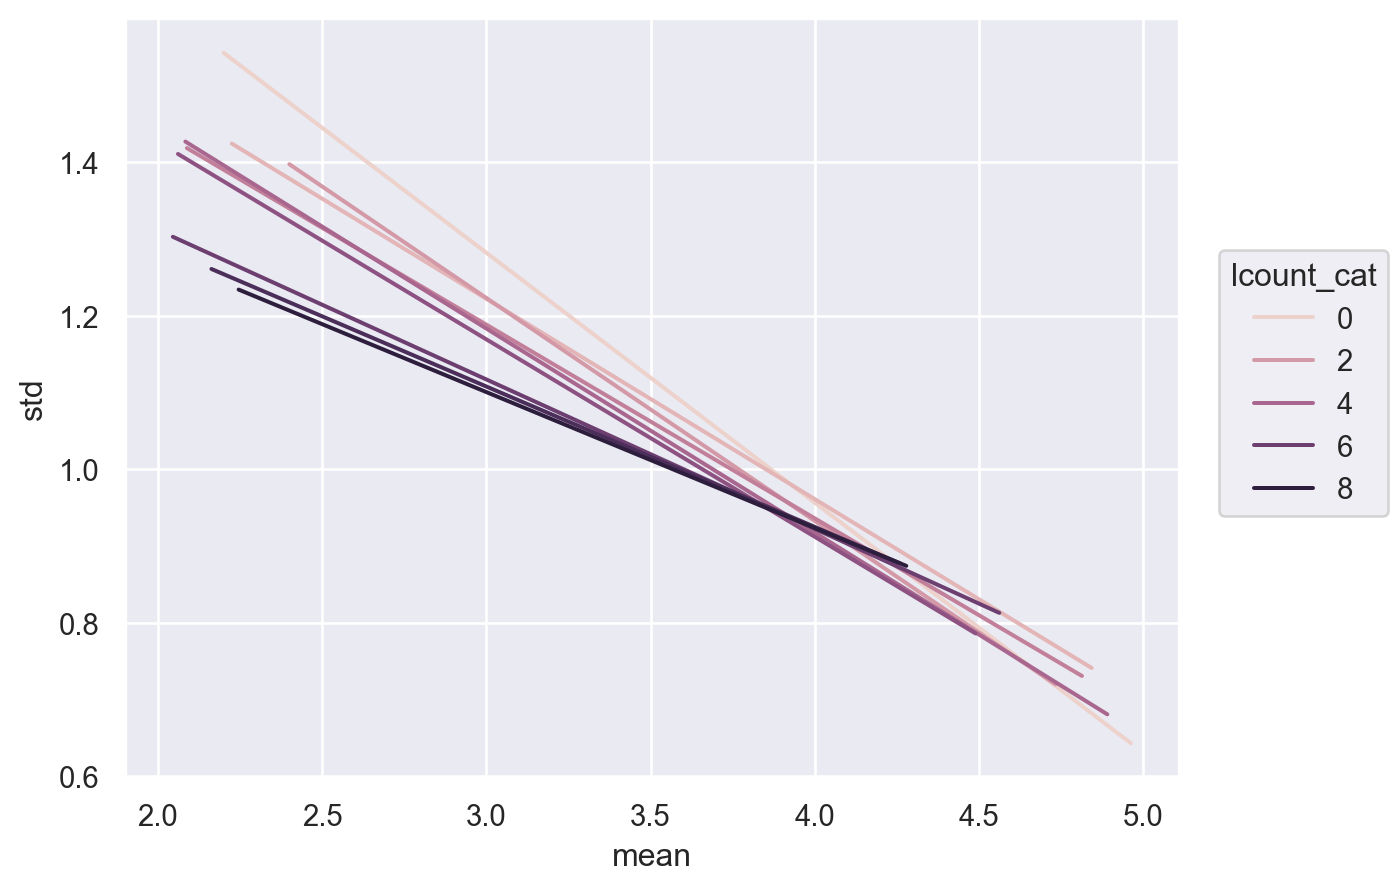

In [28]:
(
    so.Plot(user_stats.query('mean > 2 & lcount_cat < 9'), x="mean", y="std")
    .add(so.Line(), so.PolyFit(1), color="lcount_cat")
)

In [29]:
pd.options.display.max_rows=8

9. 장르별로 남녀의 선호 차이를 살펴봅니다.
    - `movies` 데이터는 `genres`가 | 기호로 나누어 표기되어 있어서 분석을 위해서는 가공할 필요가 있는데, 다음 코드를 이용해 long format으로 바꾸세요.

In [30]:
movies_long = movies.copy()

movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

In [31]:
movies_long.head(8)

   movie_id                    title      genres
0         1         Toy Story (1995)   Animation
0         1         Toy Story (1995)  Children's
0         1         Toy Story (1995)      Comedy
1         2           Jumanji (1995)   Adventure
1         2           Jumanji (1995)  Children's
1         2           Jumanji (1995)     Fantasy
2         3  Grumpier Old Men (1995)      Comedy
2         3  Grumpier Old Men (1995)     Romance

In [32]:
pd.read_parquet("data/movies_long_all.parquet")

FileNotFoundError: [Errno 2] No such file or directory: 'data/movies_long_all.parquet'

In [ ]:
movies_long_all = movies_long.merge(user_rating)
movies_long_all 

         movie_id                  title     genres  user_id gender  age  \
0               1       Toy Story (1995)  Animation        1      F    1   
1               1       Toy Story (1995)  Animation        6      F   50   
2               1       Toy Story (1995)  Animation        8      M   25   
...           ...                    ...        ...      ...    ...  ...   
2101812      3952  Contender, The (2000)   Thriller     5837      M   25   
2101813      3952  Contender, The (2000)   Thriller     5927      M   35   
2101814      3952  Contender, The (2000)   Thriller     5998      M   18   

         occupation    zip  rating   timestamp  
0                10  48067       5   978824268  
1                 9  55117       4   978237008  
2                12  11413       4   978233496  
...             ...    ...     ...         ...  
2101812           7  60607       4  1011902656  
2101813          14  10003       1   979852537  
2101814           4  61820       4  1001781044  

9.1 장르별로 평점의 개수를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보고, 남녀 차이가 특히 많이 나는 장르를 살펴보세요.

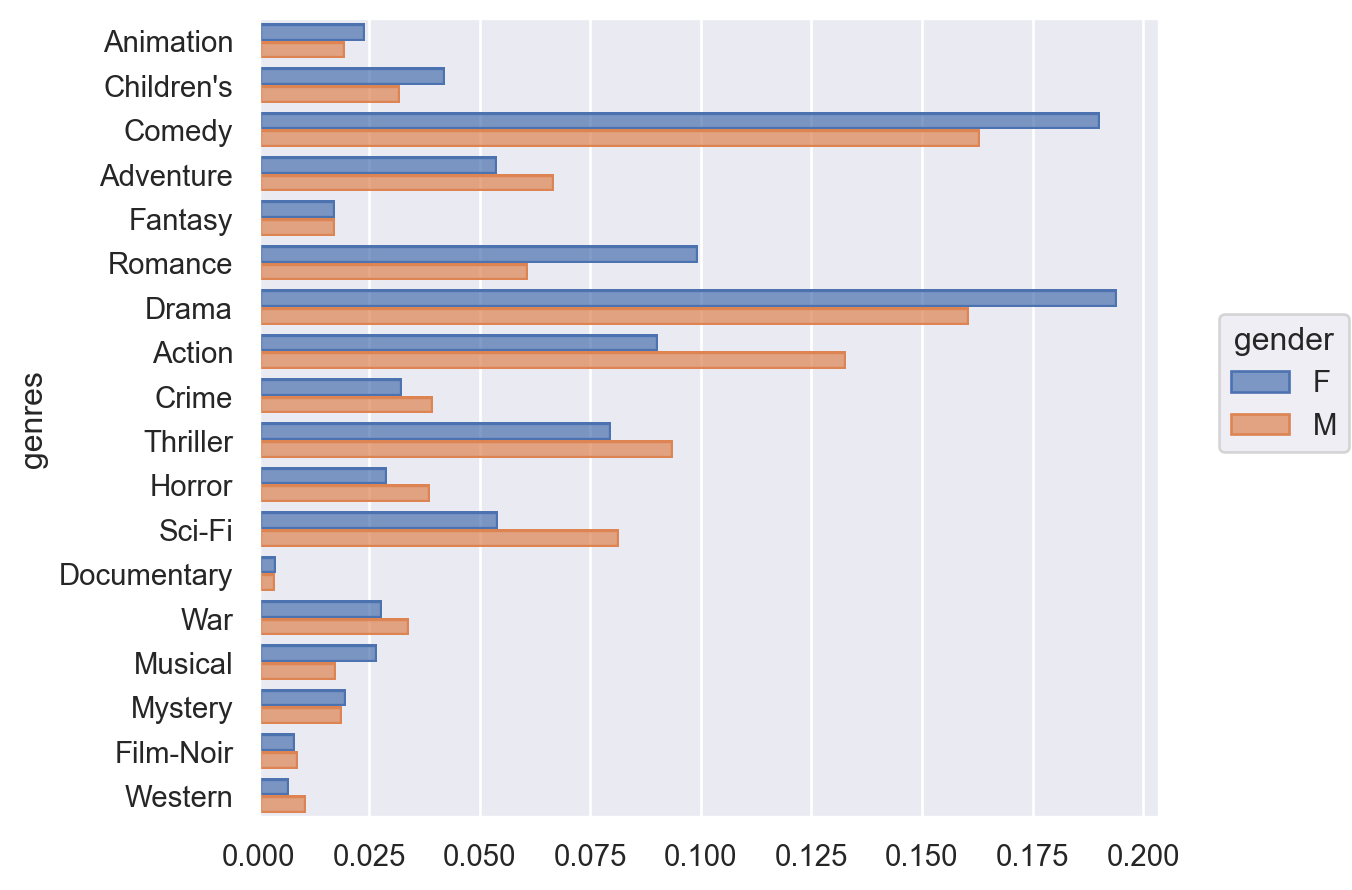

In [ ]:
(
    so.Plot(movies_long_all, y="genres", color="gender")
    .add(so.Bar(), so.Hist("proportion", common_norm=False), so.Dodge())
)

9.2 이번에는 장르별로 평점의 **평균**를 남녀별로 간단히 플랏으로 확인해보세요.

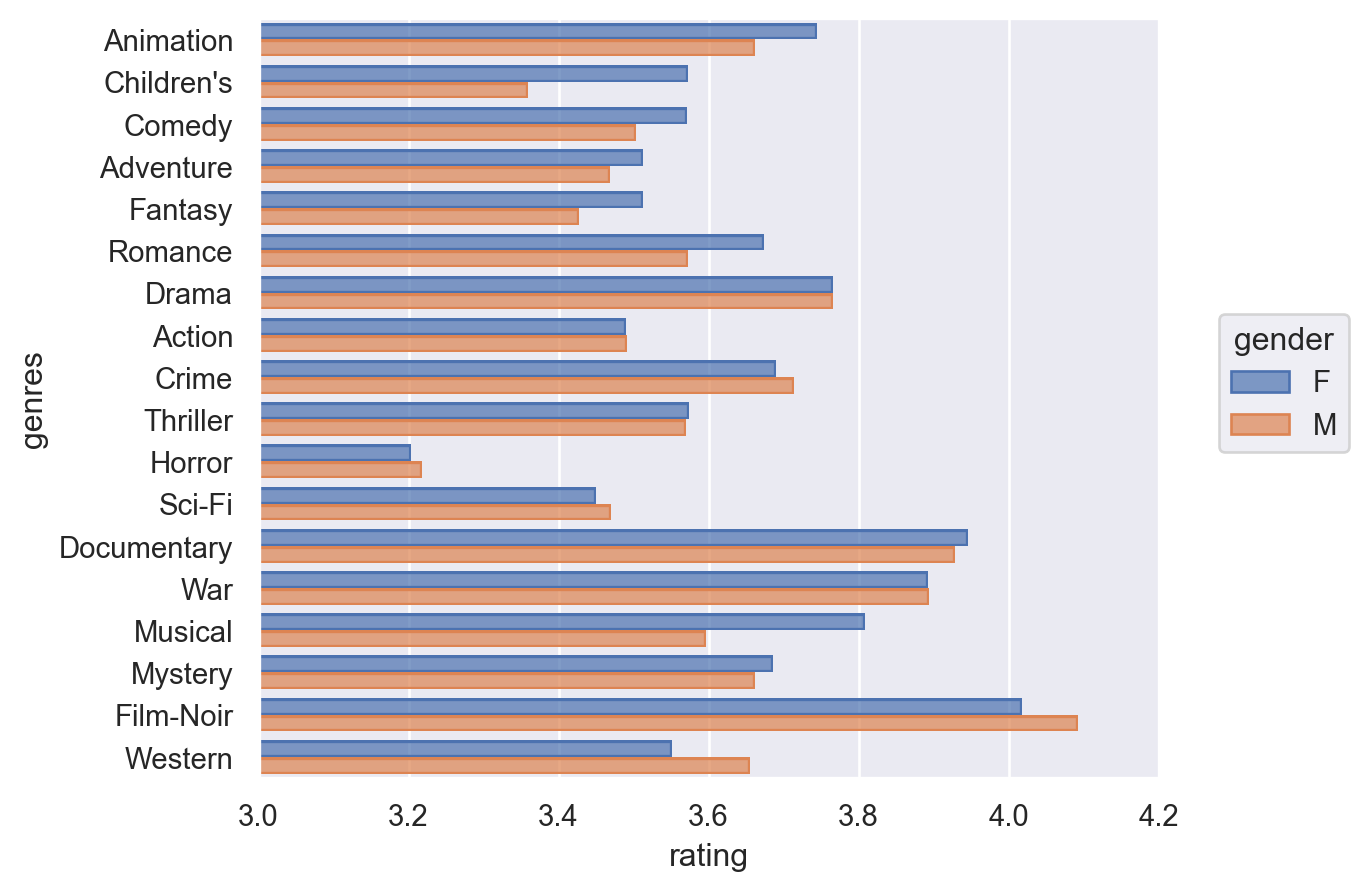

In [ ]:
(
    so.Plot(movies_long_all, y="genres", x="rating", color="gender")
    .add(so.Bar(), so.Agg(), so.Dodge())
    .limit(x=(3, 4.2))
)

9.3 위의 플랏에서 살펴본 **평균** 평점의 값을 직접 구해봅니다. 장르별, 남녀로 그룹핑을 하여 **평균** 평점을 다음과 같이 나오도록 구해보세요.

In [ ]:
genre_gender_wide = (
    movies_long_all.groupby(["genres", "gender"])["rating"]
    .mean()
    .unstack()
    .reset_index()
)
genre_gender_wide

gender     genres    F    M
0          Action 3.49 3.49
1       Adventure 3.51 3.47
2       Animation 3.74 3.66
..            ...  ...  ...
15       Thriller 3.57 3.57
16            War 3.89 3.89
17        Western 3.55 3.66

[18 rows x 3 columns]

9.4 영화별 남녀의 평균 평점의 차이(Female - Male) 순으로 **정렬된** 플랏을 대략적으로 다음과 같이 그려봅니다.

In [ ]:
genre_gender_diff = genre_gender_wide.assign(
    diff = lambda x: x.F - x.M
).sort_values("diff")
genre_gender_diff

gender      genres    F    M  diff
17         Western 3.55 3.66 -0.10
9        Film-Noir 4.02 4.09 -0.07
5            Crime 3.69 3.71 -0.02
..             ...  ...  ...   ...
13         Romance 3.67 3.57  0.10
11         Musical 3.81 3.60  0.21
3       Children's 3.57 3.36  0.21

[18 rows x 4 columns]

In [ ]:
genre_gender_mean = (
    movies_long_all.groupby(["genres", "gender"])["rating"]
    .mean()
    .reset_index()
)
genre_gender_mean

       genres gender  rating
0      Action      F    3.49
1      Action      M    3.49
2   Adventure      F    3.51
..        ...    ...     ...
33        War      M    3.89
34    Western      F    3.55
35    Western      M    3.66

[36 rows x 3 columns]

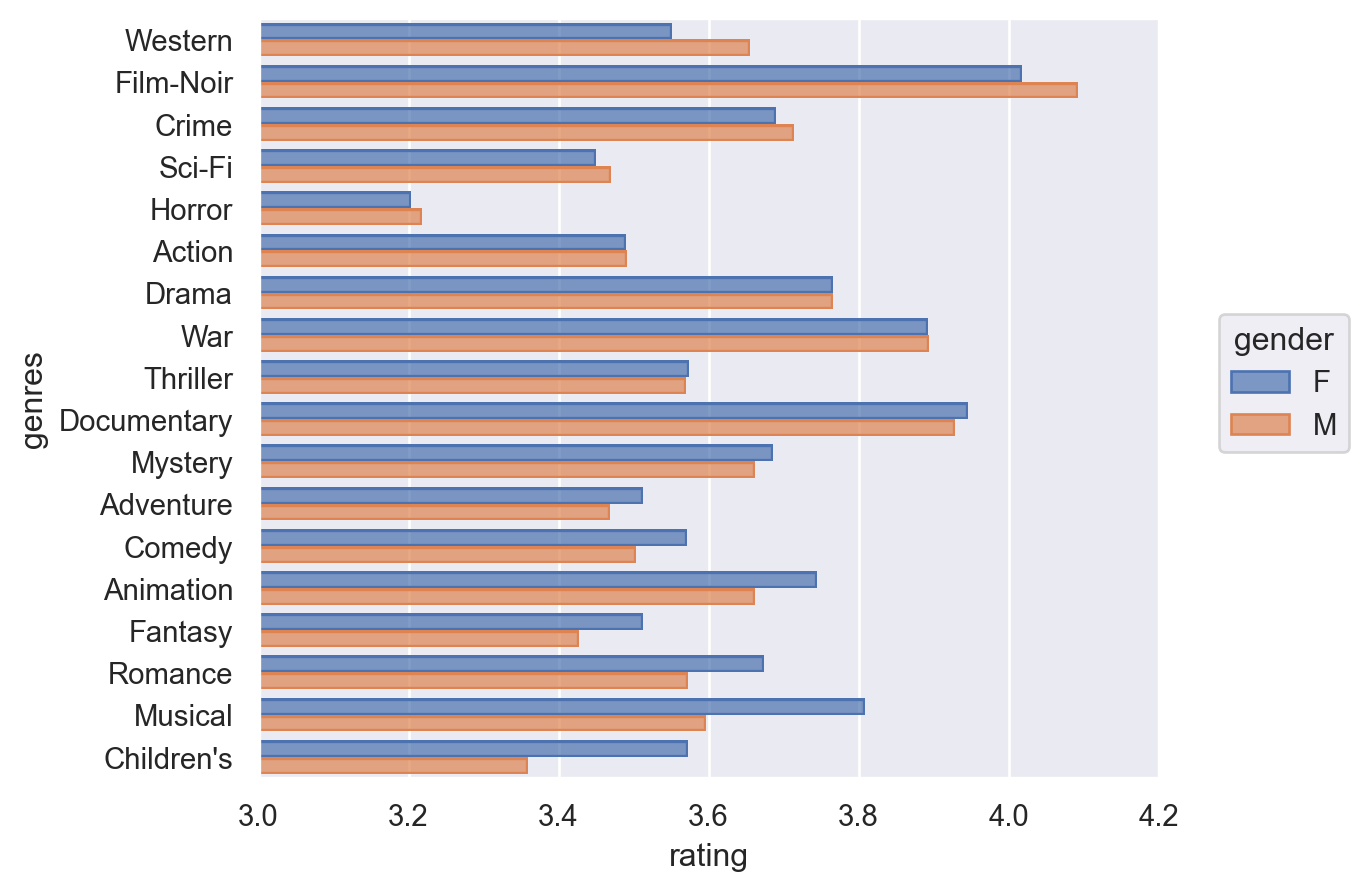

In [ ]:
(
    so.Plot(genre_gender_mean, y="genres", x="rating", color="gender")
    .add(so.Bar(), so.Dodge())
    .scale(
        y=so.Nominal(order=genre_gender_diff["genres"].values),
    )
    .limit(x=(3, 4.2))
)

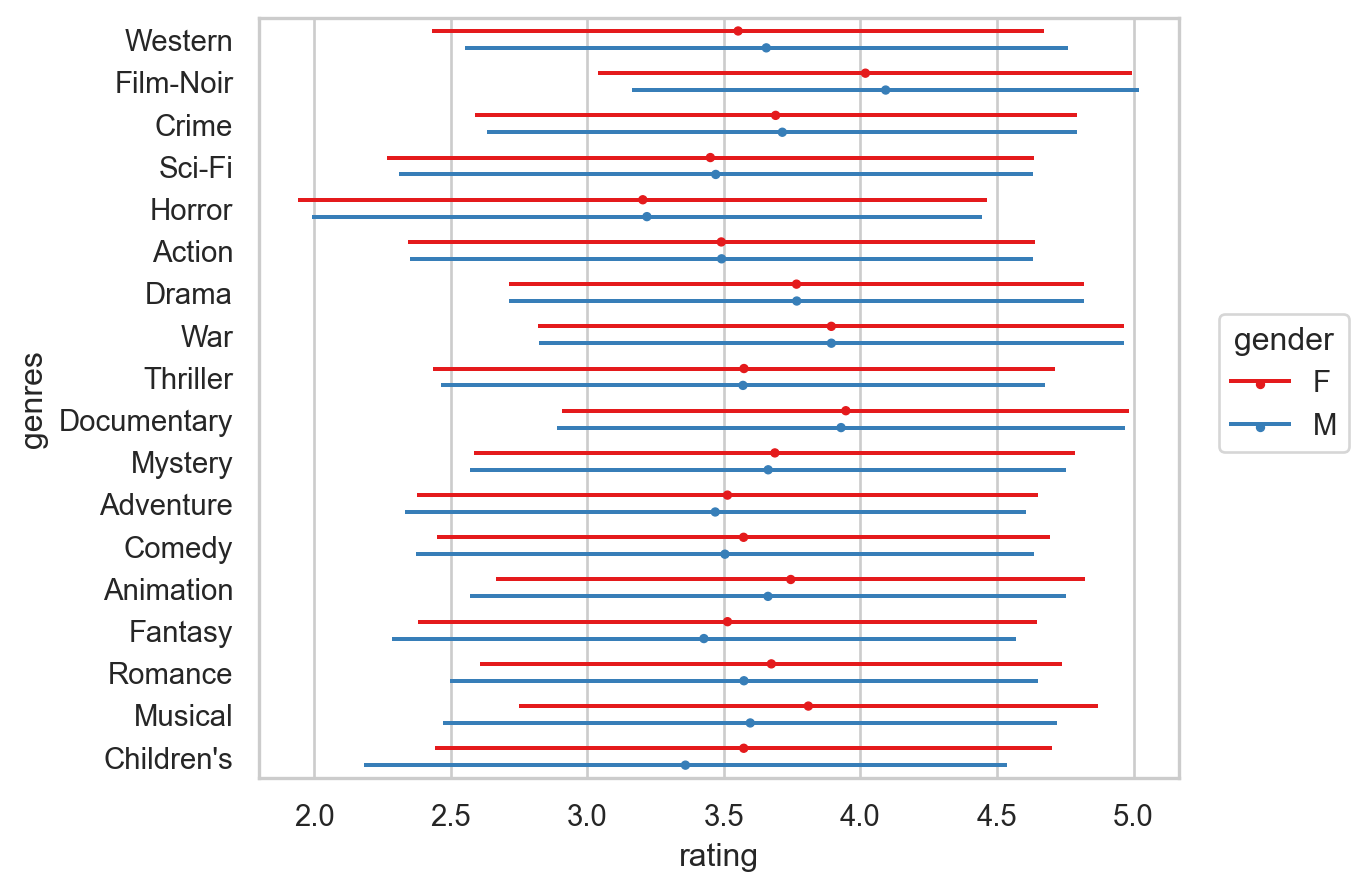

In [ ]:
(
    so.Plot(movies_long_all, x="rating", y="genres", color="gender")
    .add(so.Range(), so.Est("mean", errorbar="sd"), so.Dodge())
    .add(so.Dot(pointsize=3), so.Agg("mean"), so.Dodge())
    .scale(
        y=so.Nominal(order=genre_gender_diff["genres"].values)
    )
)

10. 장르별로 나이대에 따른 영화시청에 차이가 있는지 살펴봅니다.

10.1 우선, 위에서 western 장르가 남녀의 평점 차이가 가장 크게 나타나 남성이 선호하는 것으로 보이는데 western 장르만 따로 떼어 나이대 별로 rating에 차이가 있는지 살펴봅니다.

In [ ]:
western = movies_long_all.query('genres == "Western"')

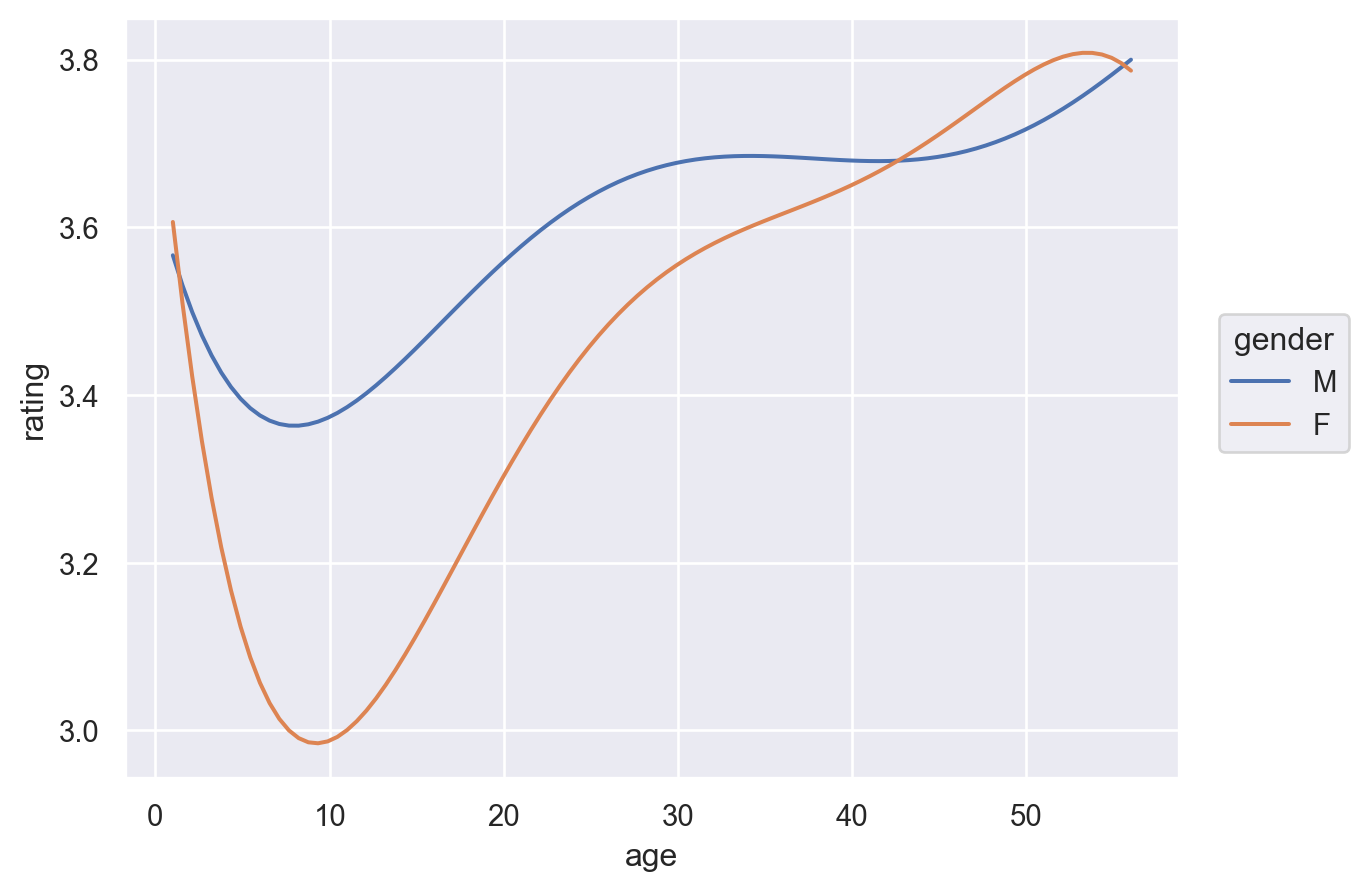

In [ ]:
(
    so.Plot(western, x="age", y="rating", color="gender")
    .add(so.Line(), so.PolyFit(5))
)

In [ ]:
western_age_gender = western.groupby(["age", "gender"])["rating"].agg(["mean", "size"]).reset_index()
western_age_gender

    age gender  mean  size
0     1      F  3.60    91
1     1      M  3.57   244
2    18      F  3.24   503
..  ...    ...   ...   ...
11   50      M  3.73  2090
12   56      F  3.77   220
13   56      M  3.80  1113

[14 rows x 4 columns]

In [ ]:
western_age_gender["total"] = western_age_gender.groupby("gender")["size"].transform("sum")

In [ ]:
western_age_gender = western_age_gender.assign(
    ratio = lambda x: x["size"] / x["total"]
)
western_age_gender

    age gender  mean  size  total  ratio
0     1      F  3.60    91   3477   0.03
1     1      M  3.57   244  17206   0.01
2    18      F  3.24   503   3477   0.14
..  ...    ...   ...   ...    ...    ...
11   50      M  3.73  2090  17206   0.12
12   56      F  3.77   220   3477   0.06
13   56      M  3.80  1113  17206   0.06

[14 rows x 6 columns]

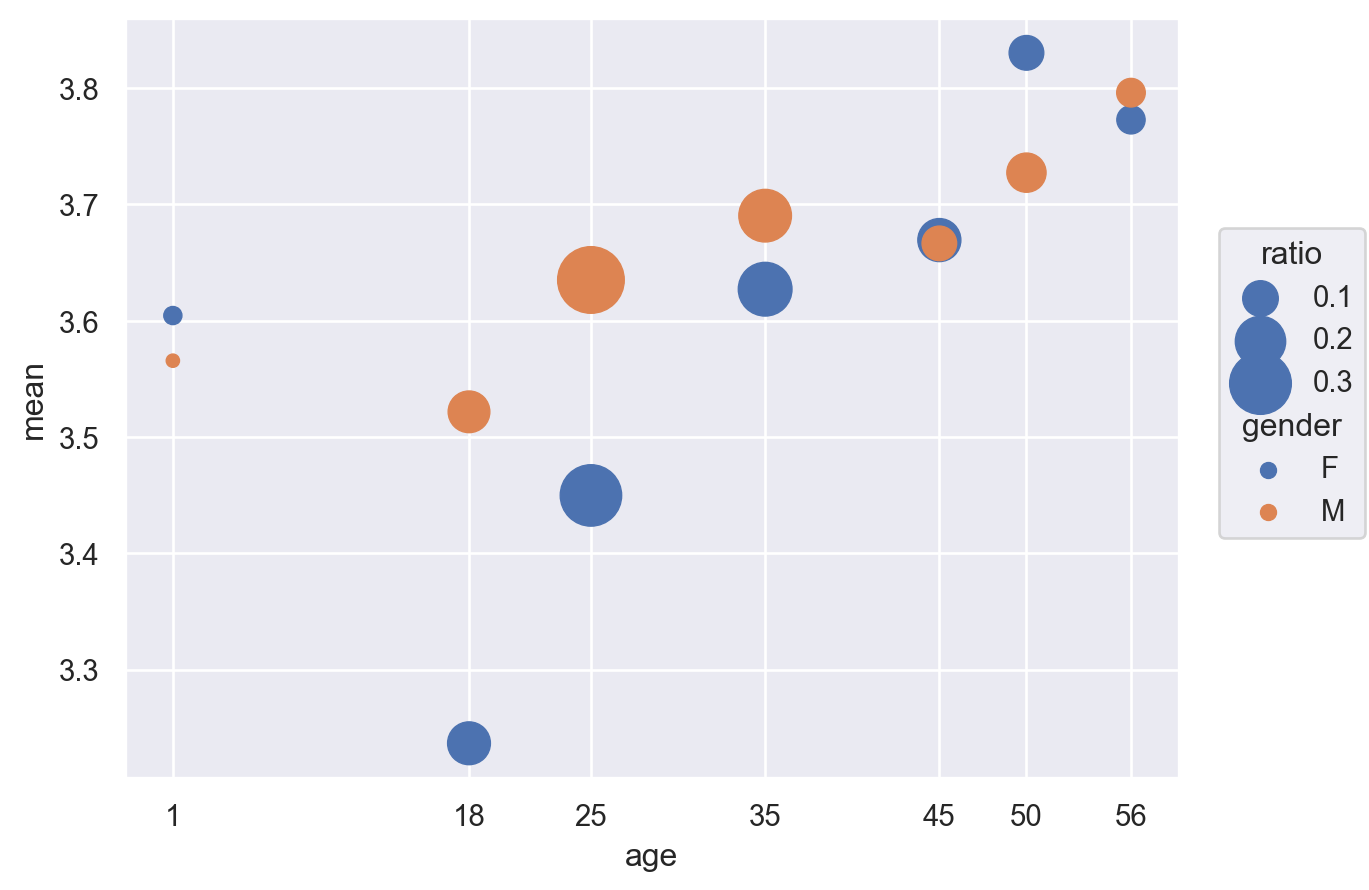

In [ ]:
(
    so.Plot(western_age_gender, x="age", y="mean", pointsize="ratio", color="gender")
    .add(so.Dot())
    .scale(pointsize=(5, 25))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

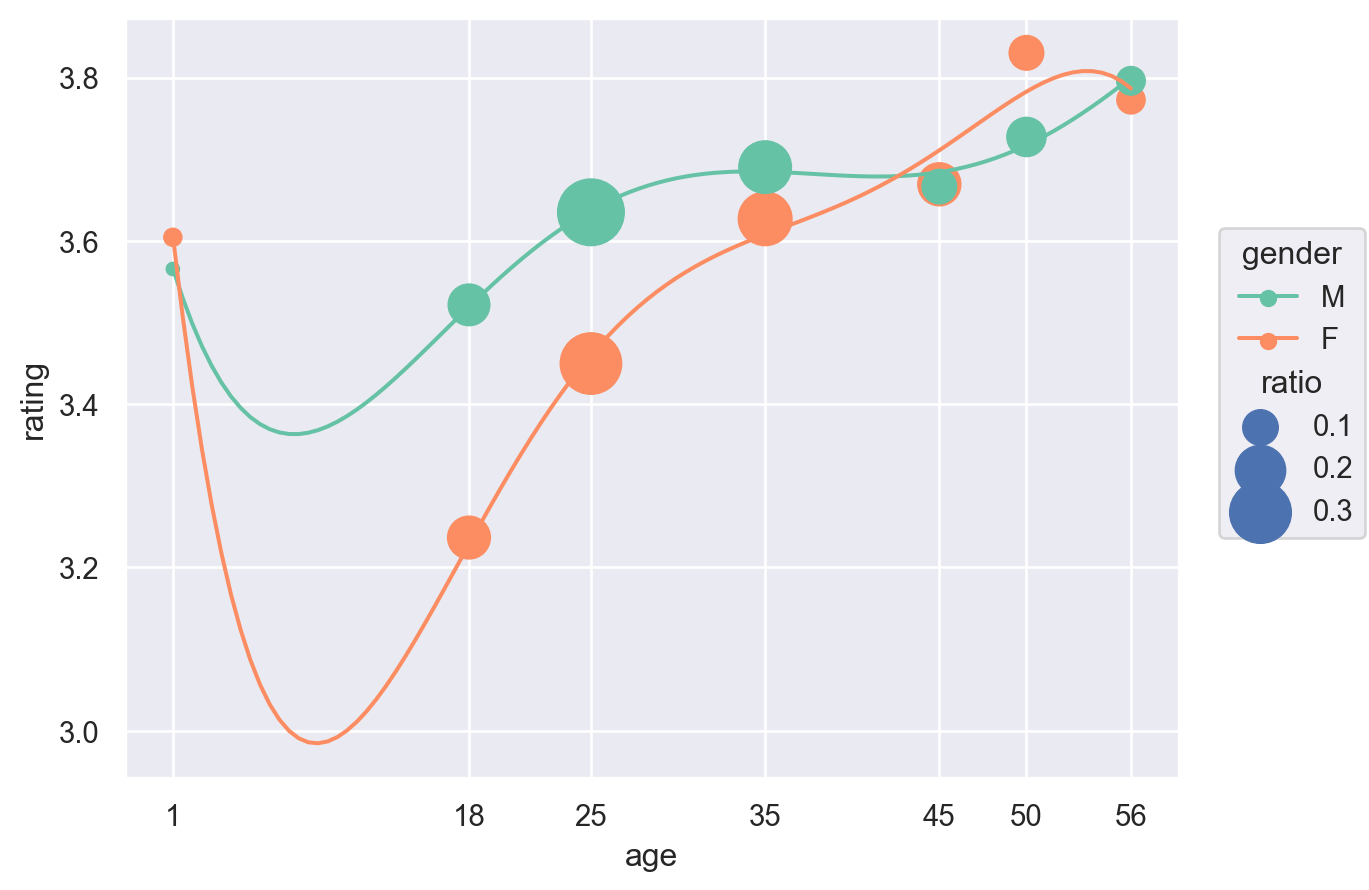

In [ ]:
(
    so.Plot(western, x="age", y="rating", color="gender")
    .add(so.Line(), so.PolyFit(5))
    .add(so.Dot(), x=western_age_gender["age"], y=western_age_gender["mean"], pointsize=western_age_gender["ratio"], color=western_age_gender["gender"])
    .scale(color="Set2", pointsize=(5, 25))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

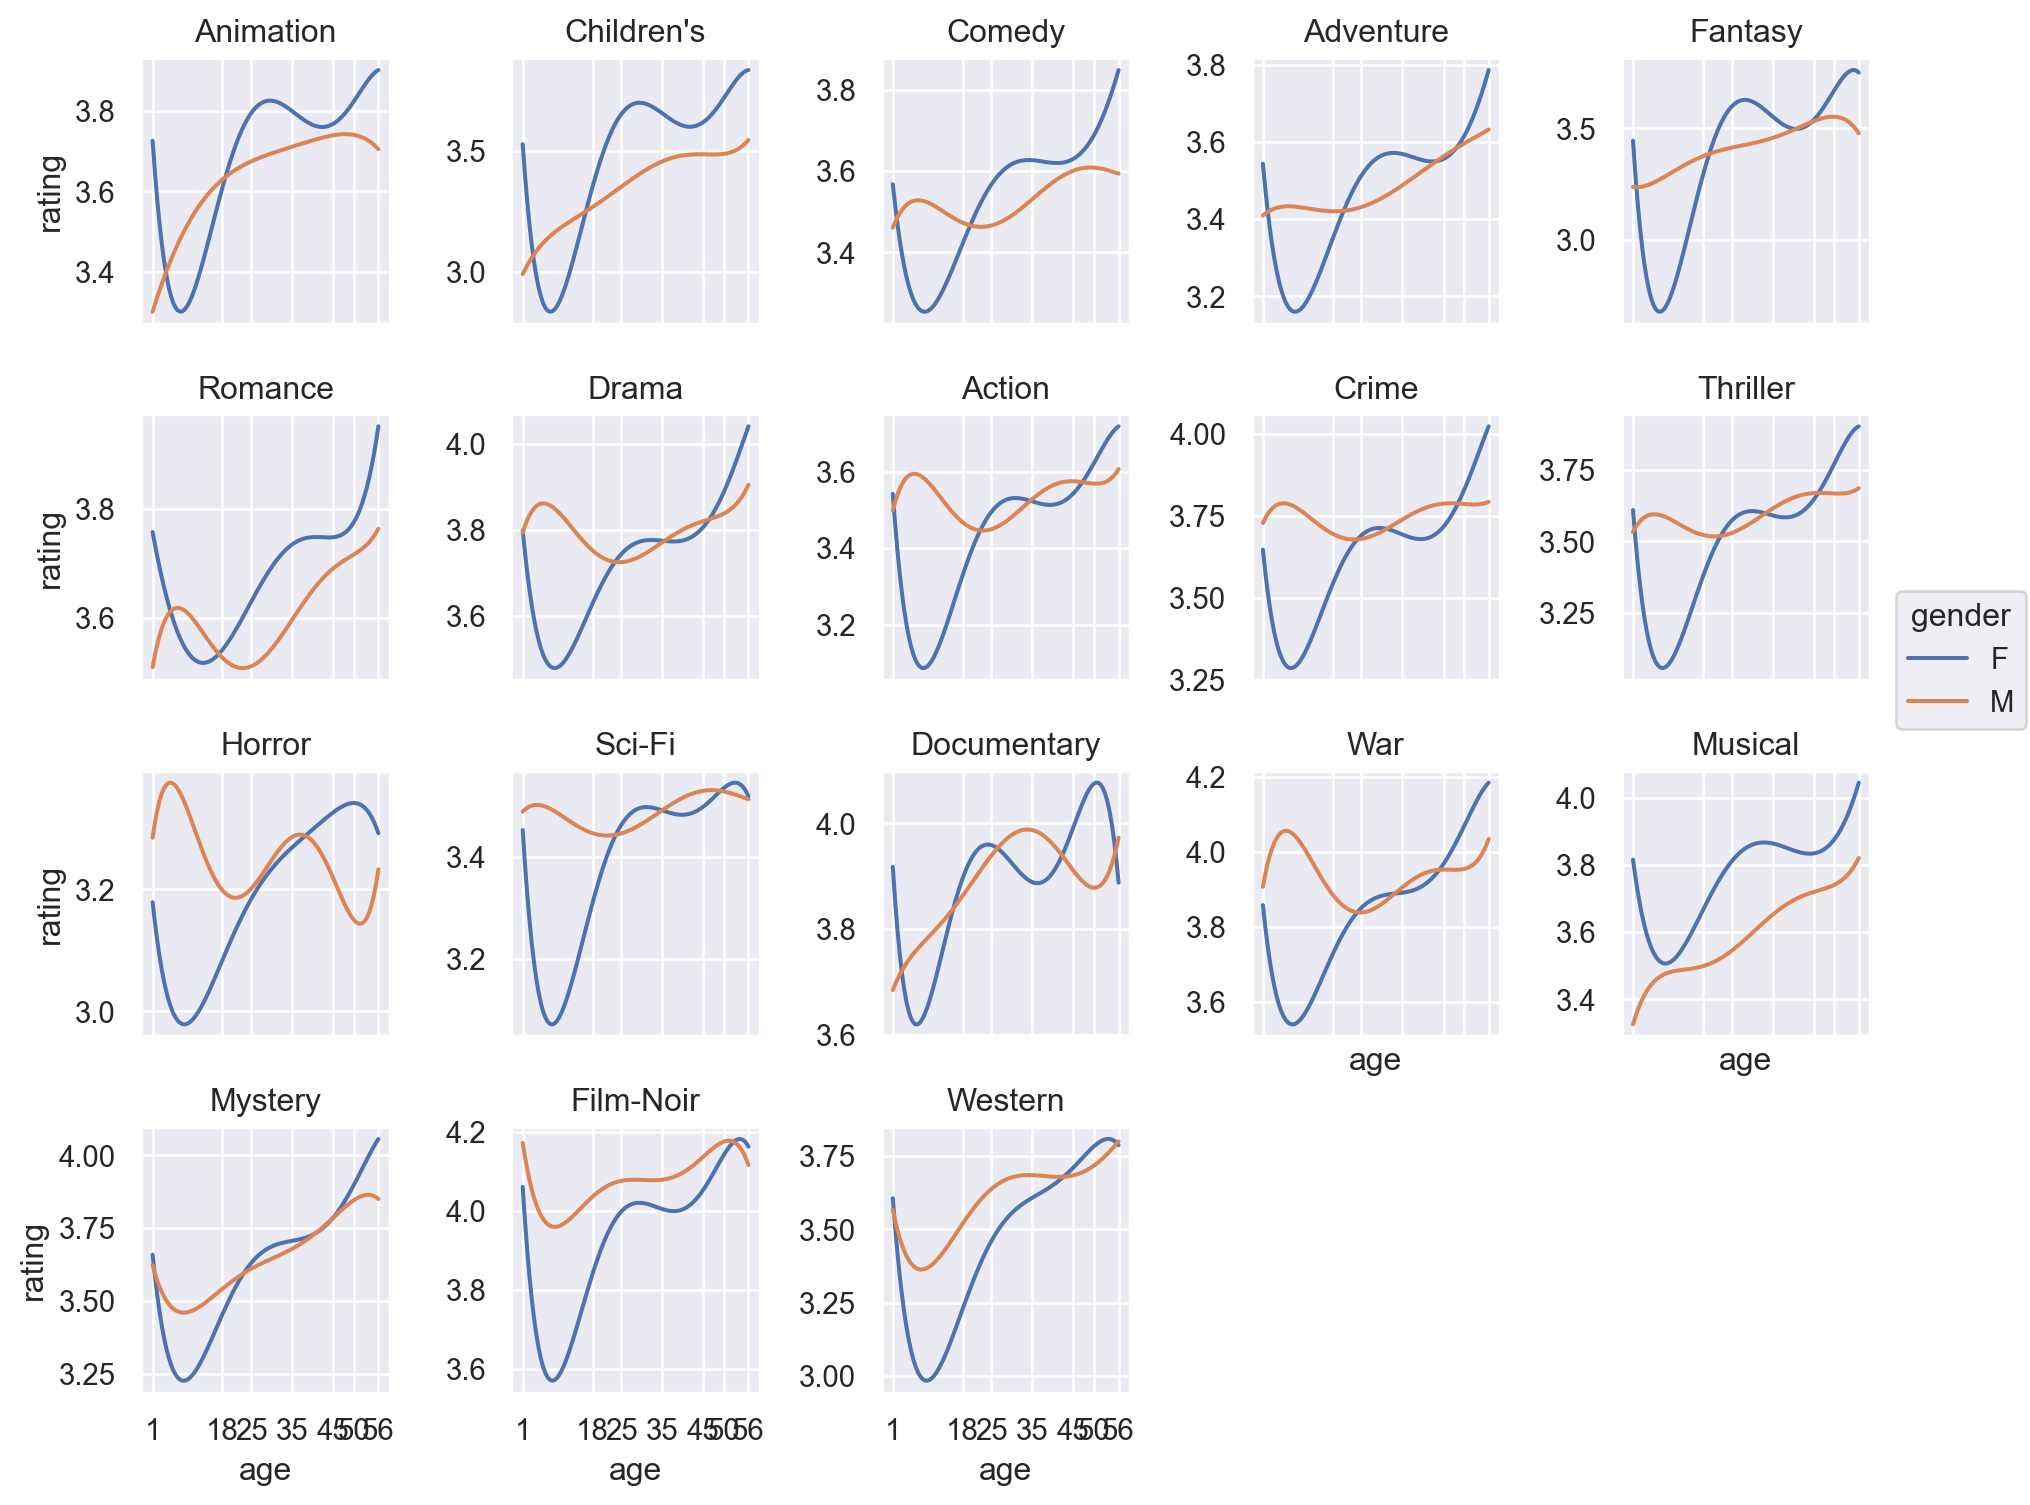

In [ ]:
(
    so.Plot(movies_long_all, x="age", y="rating", color="gender")
    .add(so.Line(), so.PolyFit(5))
    .facet("genres", wrap=5)
    .share(y=False)
    .layout(size=(10, 8))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

11. 영화 제목에 있는 출시년도를 추출해 이용하기 위해 다음 코드를 활용하세요.

In [ ]:
movies["year"] = movies["title"].str.extract(r'\((\d{4})\)').astype("int")
movies

      movie_id                    title                        genres  year
0            1         Toy Story (1995)   Animation|Children's|Comedy  1995
1            2           Jumanji (1995)  Adventure|Children's|Fantasy  1995
2            3  Grumpier Old Men (1995)                Comedy|Romance  1995
...        ...                      ...                           ...   ...
3880      3950         Tigerland (2000)                         Drama  2000
3881      3951  Two Family House (2000)                         Drama  2000
3882      3952    Contender, The (2000)                Drama|Thriller  2000

[3883 rows x 4 columns]

11.1 먼저 출시년도별로 얼마나 영화가 있는지 분포를 살펴보세요.

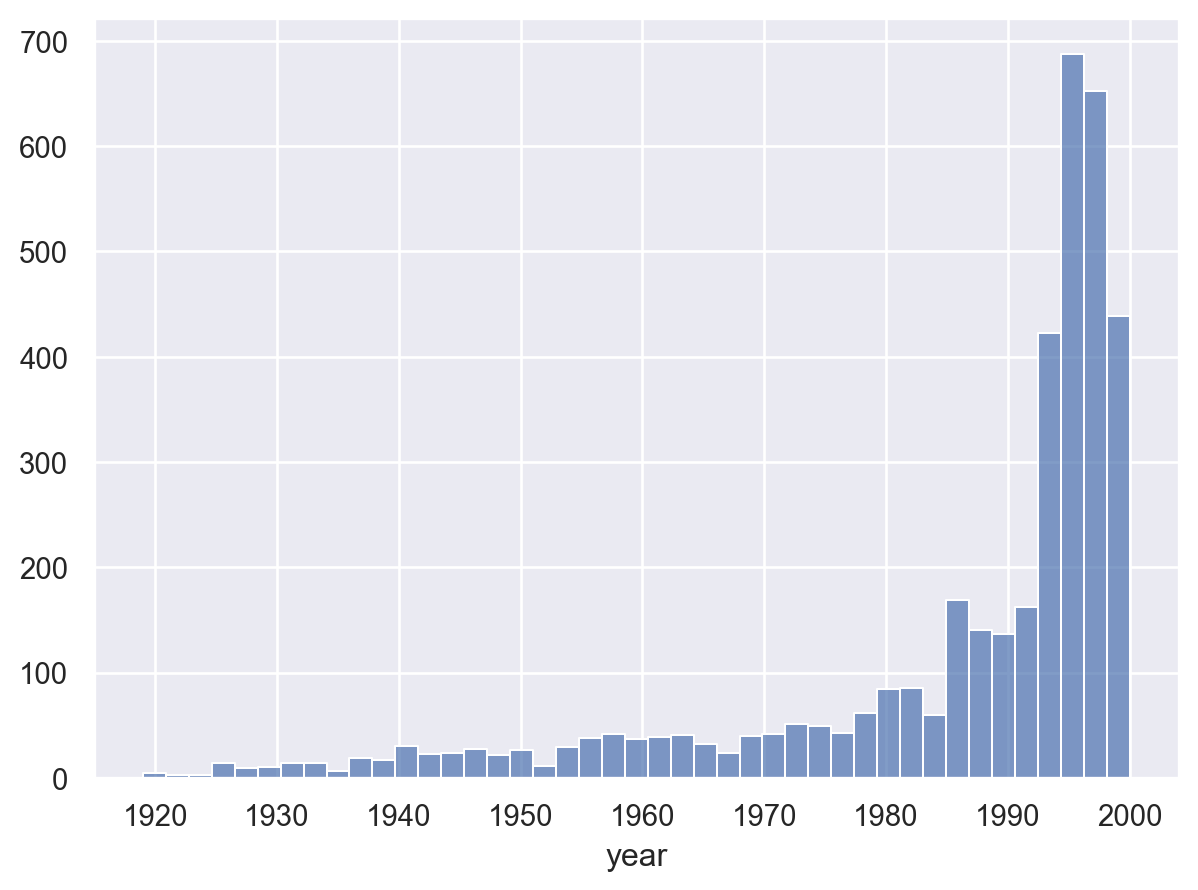

In [ ]:
(
    so.Plot(movies, x="year")
    .add(so.Bars(), so.Hist())
)

11.2 출시년도가 없는 영화가 있는가요?

In [ ]:
movies.year.value_counts(dropna=False)

1996    345
1995    342
1998    337
       ... 
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

11.3 오래된 영화일 수록 나이든 사람들의 시청 비율이 높을지에 대해 분포를 살펴보세요.

In [ ]:
year_movies = pd.merge(user_rating[["user_id", "gender", "age", "movie_id", "rating"]], movies)
year_movies

         user_id gender  age  movie_id  rating  \
0              1      F    1      1193       5   
1              2      M   56      1193       5   
2             12      M   25      1193       4   
...          ...    ...  ...       ...     ...   
1000206     5780      M   18      2845       1   
1000207     5851      F   18      3607       5   
1000208     5938      M   25      2909       4   

                                               title                genres  \
0             One Flew Over the Cuckoo's Nest (1975)                 Drama   
1             One Flew Over the Cuckoo's Nest (1975)                 Drama   
2             One Flew Over the Cuckoo's Nest (1975)                 Drama   
...                                              ...                   ...   
1000206                            White Boys (1999)                 Drama   
1000207                     One Little Indian (1973)  Comedy|Drama|Western   
1000208  Five Wives, Three Secretaries and Me (1998) 

/Users/georgeair/miniconda3/envs/envconda/lib/python3.11/site-packages/seaborn/_core/groupby.py:113: RankWarning: Polyfit may be poorly conditioned
  return self._reorder_columns(func(data, *args, **kwargs), data)


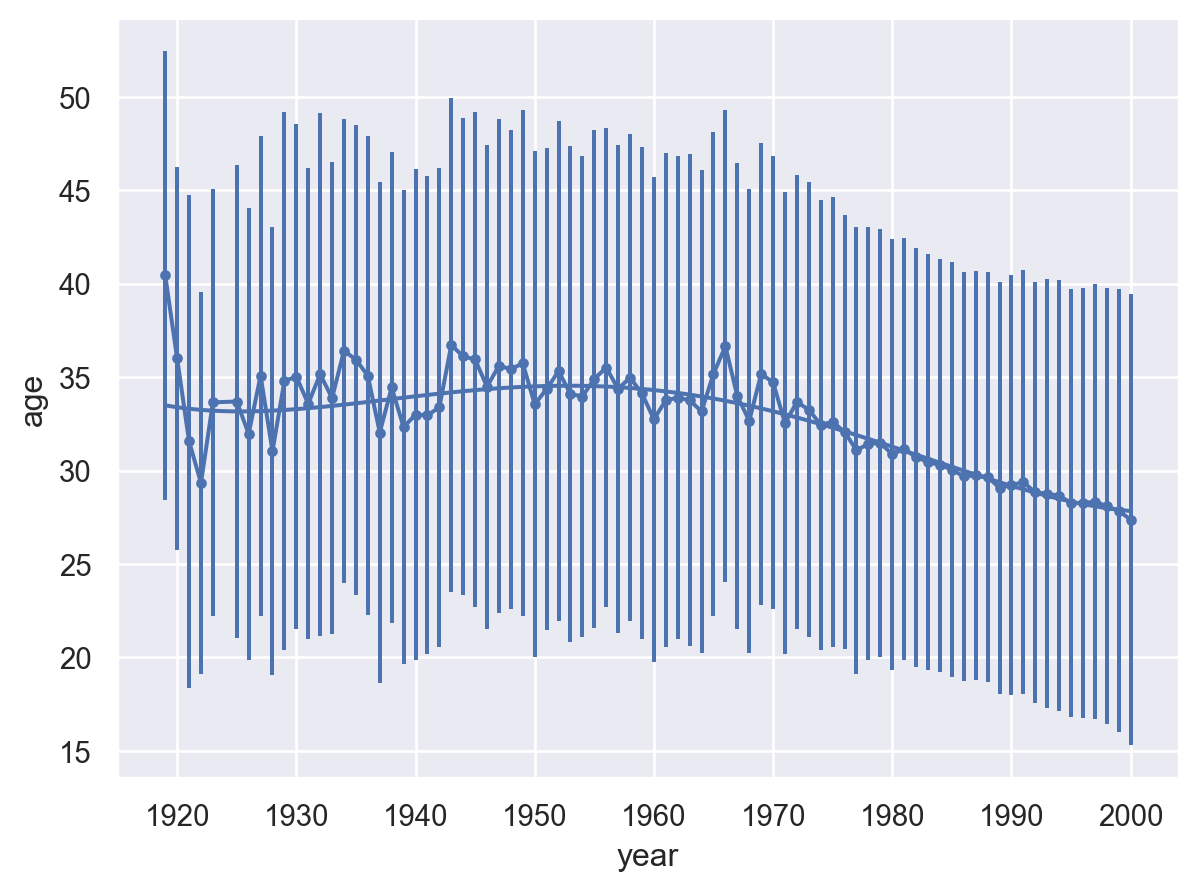

In [ ]:
(
    so.Plot(year_movies, x="year", y="age")
    .add(so.Range(), so.Est("mean", errorbar="sd"))
    .add(so.Line(marker="."), so.Agg())
    .add(so.Line(), so.PolyFit(5))
)

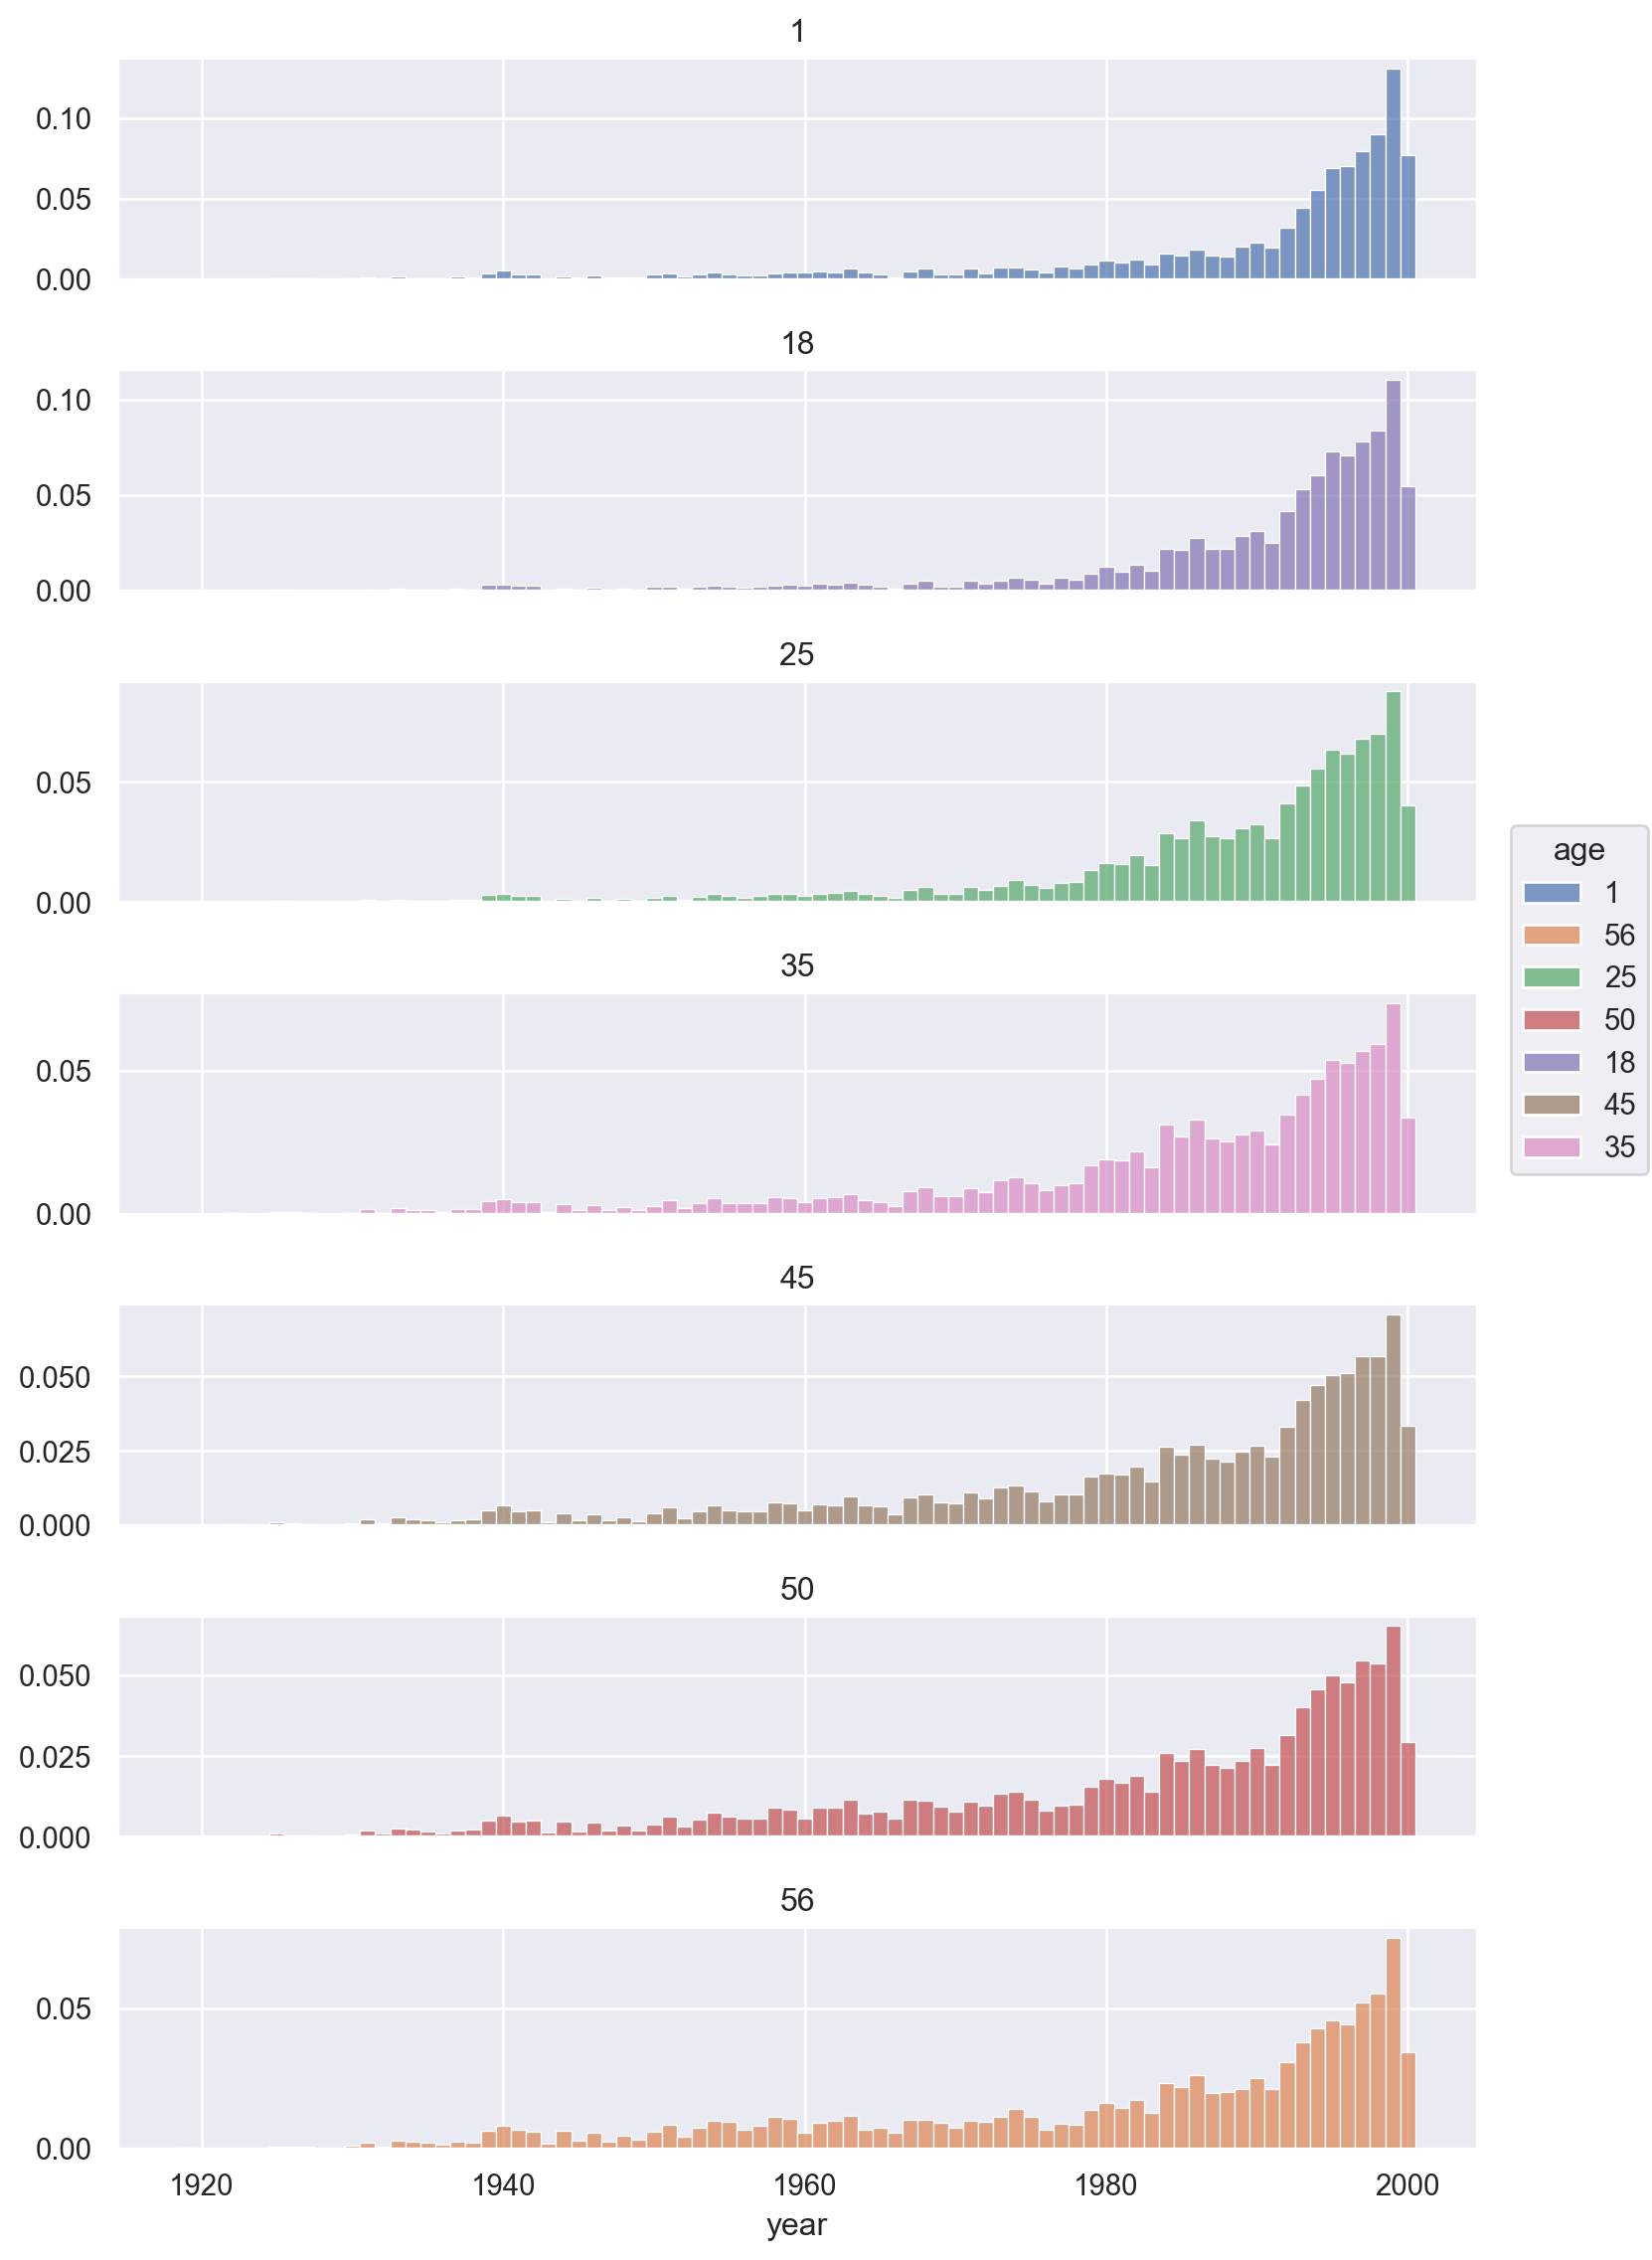

In [ ]:
year_movies = year_movies.assign(
    age = lambda x: pd.Categorical(x.age, categories=["1", "18", "25", "35", "45", "50", "56"], ordered=True)
)
(
    so.Plot(year_movies, x="year", color="age")
    .add(so.Bars(), so.Hist("proportion", common_norm=False, discrete=True))
    .share(y=False)
    .facet("age", wrap=1)
    .layout(size=(8, 12))
)

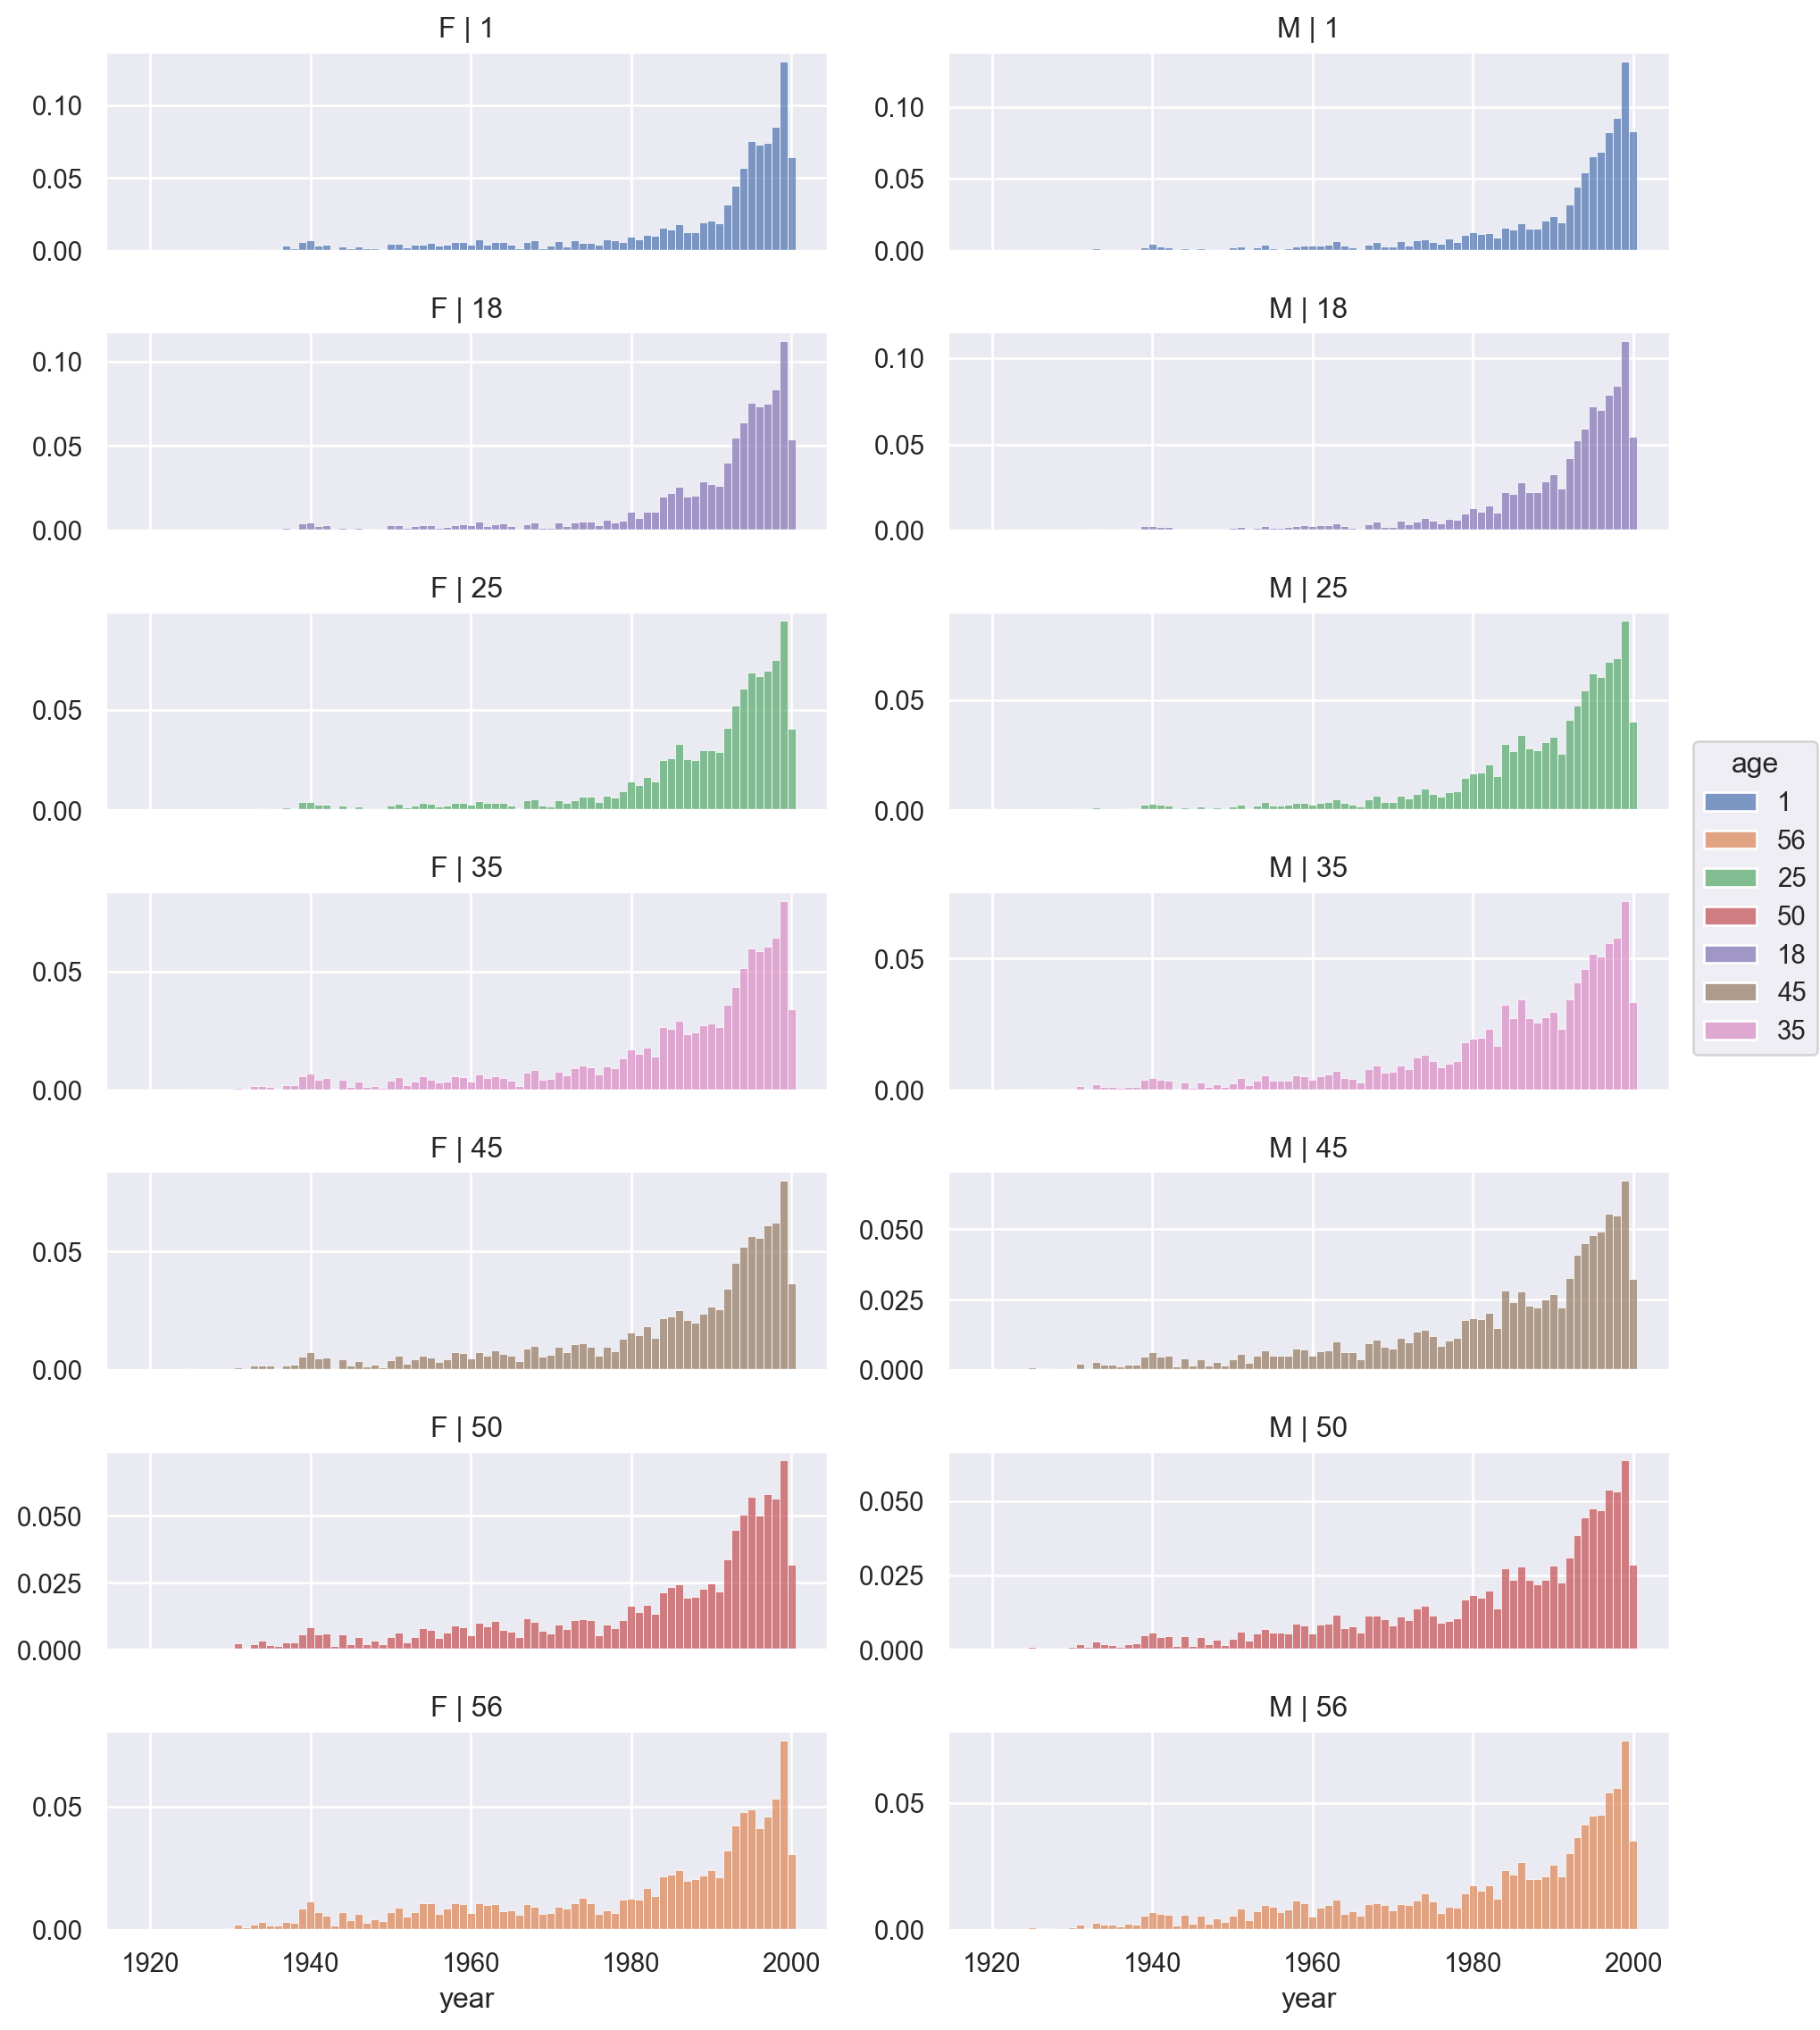

In [ ]:
(
    so.Plot(year_movies, x="year", color="age")
    .add(so.Bars(), so.Hist("proportion", common_norm=False, discrete=True))
    .share(y=False)
    .facet(row="age", col="gender")
    .layout(size=(10, 12))
)

11. 10년 기준으로 년대를 정했을 때, 코미디 장르의 영화 비율의 년대별 변화를 살펴봅니다.

In [ ]:
movies_long["year"] = movies_long["title"].str.extract(r'\((\d{4})\)').astype("int")

movies_long_10 = movies_long.assign(
    decade = lambda x: np.int_(np.floor(x.year / 10) * 10)
)
movies_long_10

      movie_id                    title      genres  year  decade
0            1         Toy Story (1995)   Animation  1995    1990
0            1         Toy Story (1995)  Children's  1995    1990
0            1         Toy Story (1995)      Comedy  1995    1990
...        ...                      ...         ...   ...     ...
3881      3951  Two Family House (2000)       Drama  2000    2000
3882      3952    Contender, The (2000)       Drama  2000    2000
3882      3952    Contender, The (2000)    Thriller  2000    2000

[6408 rows x 5 columns]

In [ ]:
decade_perc = pd.crosstab(movies_long_10["decade"], movies_long_10["genres"], normalize="index").stack()
decade_perc

decade  genres   
1910    Action      0.20
        Adventure   0.20
        Animation   0.00
                    ... 
2000    Thriller    0.10
        War         0.01
        Western     0.00
Length: 180, dtype: float64

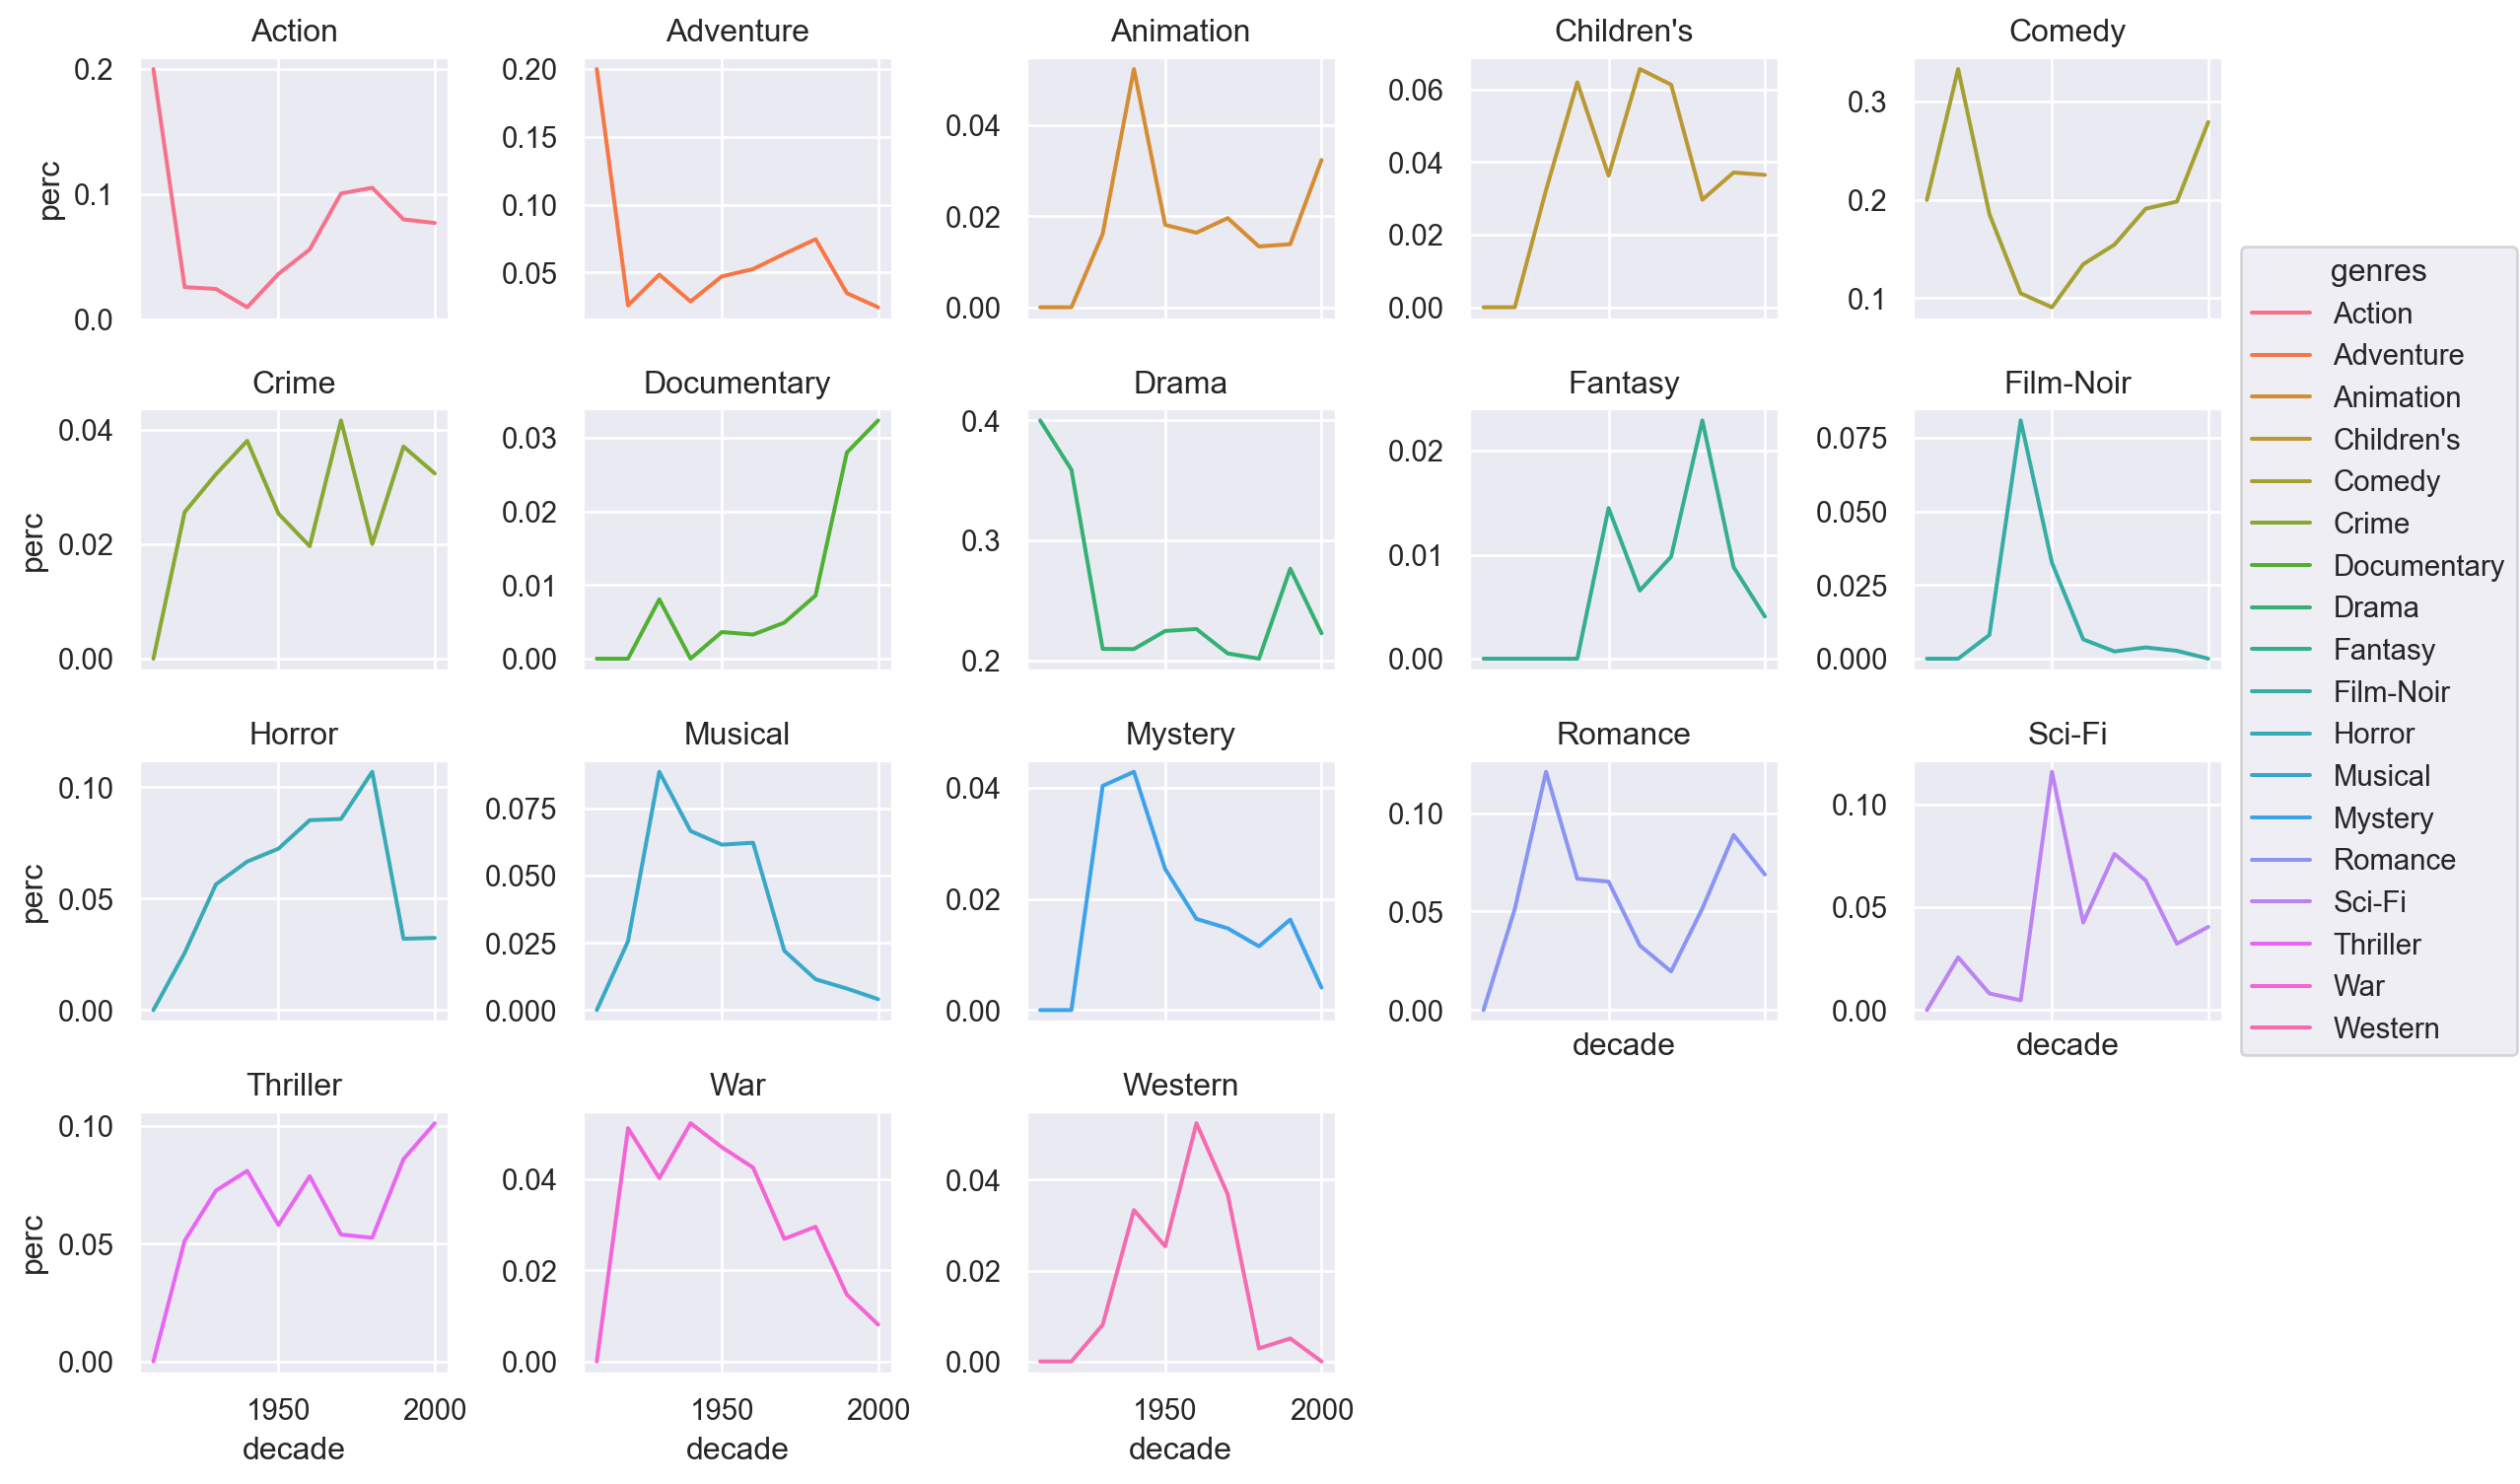

In [ ]:
(
    so.Plot(decade_perc.reset_index(name="perc"), x="decade", y="perc", color="genres")
    .add(so.Line())
    .facet("genres", wrap=5)
    .share(y=False)
    .layout(size=(12, 8))
)

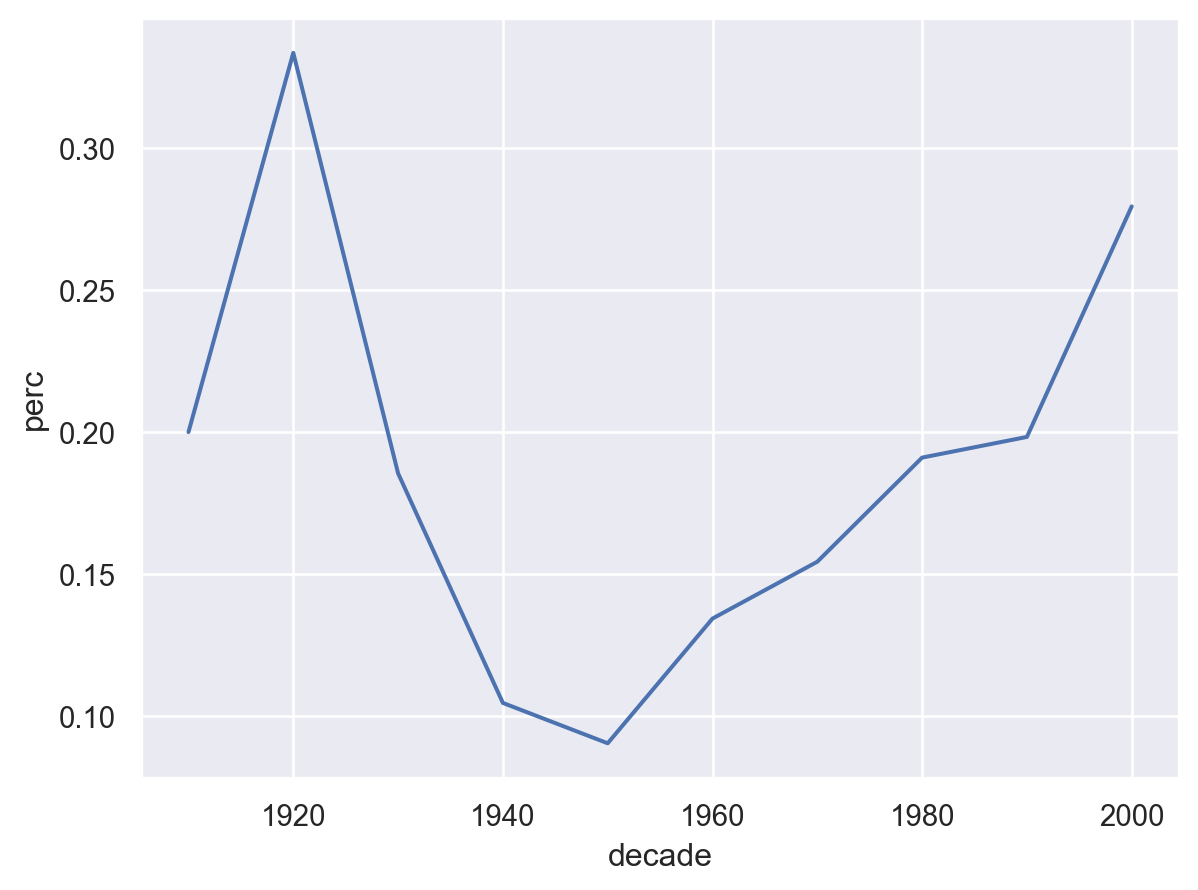

In [ ]:
(
    so.Plot(decade_perc.reset_index(name="perc").query('genres == "Comedy"'), x="decade", y="perc")
    .add(so.Line())
)

In [ ]:
ratings2 = ratings.copy()
ratings2["datetime"] = pd.to_datetime(ratings2.pop("timestamp"), unit="s", origin="unix")
ratings2


         user_id  movie_id  rating            datetime
0              1      1193       5 2000-12-31 22:12:40
1              1       661       3 2000-12-31 22:35:09
2              1       914       3 2000-12-31 22:32:48
3              1      3408       4 2000-12-31 22:04:35
4              1      2355       5 2001-01-06 23:38:11
5              1      1197       3 2000-12-31 22:37:48
6              1      1287       5 2000-12-31 22:33:59
7              1      2804       5 2000-12-31 22:11:59
8              1       594       4 2000-12-31 22:37:48
...          ...       ...     ...                 ...
1000200     6040      2028       5 2000-04-25 23:15:19
1000201     6040      1080       4 2000-05-07 16:35:22
1000202     6040      1089       4 2000-04-25 23:23:16
1000203     6040      1090       3 2000-04-26 02:18:38
1000204     6040      1091       1 2000-04-26 02:35:41
1000205     6040      1094       5 2000-04-25 23:21:27
1000206     6040       562       5 2000-04-25 23:19:06
1000207   

In [ ]:
ratings2["dow"] = ratings2["datetime"].dt.day_name().str[:3]

In [ ]:
ratings2

         user_id  movie_id  rating            datetime  dow
0              1      1193       5 2000-12-31 22:12:40  Sun
1              1       661       3 2000-12-31 22:35:09  Sun
2              1       914       3 2000-12-31 22:32:48  Sun
3              1      3408       4 2000-12-31 22:04:35  Sun
4              1      2355       5 2001-01-06 23:38:11  Sat
5              1      1197       3 2000-12-31 22:37:48  Sun
6              1      1287       5 2000-12-31 22:33:59  Sun
7              1      2804       5 2000-12-31 22:11:59  Sun
8              1       594       4 2000-12-31 22:37:48  Sun
...          ...       ...     ...                 ...  ...
1000200     6040      2028       5 2000-04-25 23:15:19  Tue
1000201     6040      1080       4 2000-05-07 16:35:22  Sun
1000202     6040      1089       4 2000-04-25 23:23:16  Tue
1000203     6040      1090       3 2000-04-26 02:18:38  Wed
1000204     6040      1091       1 2000-04-26 02:35:41  Wed
1000205     6040      1094       5 2000-

In [ ]:
ratings2["dow"] = pd.Categorical(ratings2["dow"], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ordered=True)

In [ ]:
ratings2.to_parquet("data/ratings.parquet")

In [ ]:
ratings3 = pd.read_parquet("data/ratings.parquet")
ratings3

         user_id  movie_id  rating            datetime  dow
0              1      1193       5 2000-12-31 22:12:40  Sun
1              1       661       3 2000-12-31 22:35:09  Sun
2              1       914       3 2000-12-31 22:32:48  Sun
3              1      3408       4 2000-12-31 22:04:35  Sun
4              1      2355       5 2001-01-06 23:38:11  Sat
5              1      1197       3 2000-12-31 22:37:48  Sun
6              1      1287       5 2000-12-31 22:33:59  Sun
7              1      2804       5 2000-12-31 22:11:59  Sun
8              1       594       4 2000-12-31 22:37:48  Sun
...          ...       ...     ...                 ...  ...
1000200     6040      2028       5 2000-04-25 23:15:19  Tue
1000201     6040      1080       4 2000-05-07 16:35:22  Sun
1000202     6040      1089       4 2000-04-25 23:23:16  Tue
1000203     6040      1090       3 2000-04-26 02:18:38  Wed
1000204     6040      1091       1 2000-04-26 02:35:41  Wed
1000205     6040      1094       5 2000-

In [ ]:
ratings3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   user_id   1000209 non-null  int64         
 1   movie_id  1000209 non-null  int64         
 2   rating    1000209 non-null  int64         
 3   datetime  1000209 non-null  datetime64[ns]
 4   dow       1000209 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 31.5 MB
